# Paroli simulation

In [90]:
from roulette import Roulette
from core import *
from simulations_core import *
from simulations_plots_core import *
roulette = Roulette()

The Paroli system is the reverse of the Martingale strategy. If you lose a round, you keep your stake the same. And if you win, you double your stake – this is known as ‘positive progression staking’. The overall aim of Paroli is to double your stake for three winning spins in a row. Once that happens, you go back to your starting stake.

In [91]:
def paroli_betting(goal_money_won, start, money_limit):
    money = 0
    money_history = [money]
    streak = 0
    bet = start
    while money < goal_money_won:
        if money_limit is not None and money < money_limit:
            return money_history
        
        prev_money = money 
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            streak = 0
            bet = start
        else:
            streak += 1
            bet *= 2
            if streak == 3:
                streak = 0
                bet = start

    return money_history

In [92]:
money_goals = [10, 100, 500, 1000]

## Starting bet = 1, Allowed money lost = -10

In [93]:
bet = 1
money_histories = simulate_different_goal_money(
                    betting_type = paroli_betting, 
                    goal_money_list = money_goals, 
                    number_histories = 10000,
                    start_bet= bet,
                    money_limit= -10*bet)

In [94]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [95]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))
    print(f"For goal {goal} mean money lost:")
    print(get_mean_money_lost(money_histories, goal))

For goal 10 mean money won:
10.883047707271885
For goal 10 mean money lost:
-11.0
For goal 100 mean money won:
100.81865284974093
For goal 100 mean money lost:
-11.0
For goal 500 mean money won:
0
For goal 500 mean money lost:
-11.0
For goal 1000 mean money won:
0
For goal 1000 mean money lost:
-11.0


### Analysis when the goal is to win 10 units

In [96]:
UNITS = 10

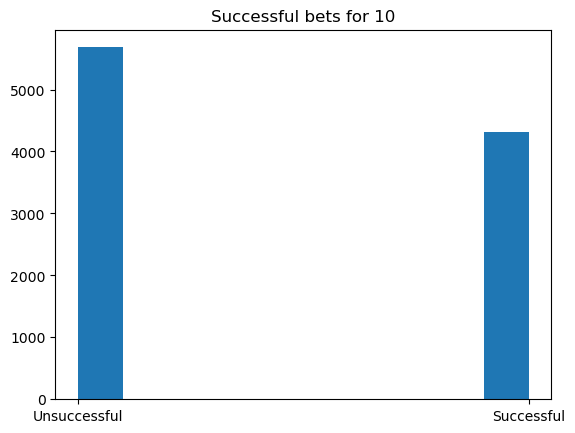

In [97]:
plot_successful_bets(money_histories[UNITS], UNITS, title=f"Successful bets for {UNITS}")

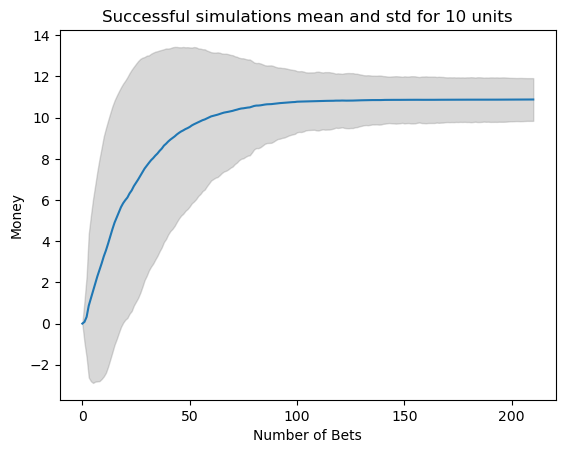

In [98]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Successful simulations mean and std for {UNITS} units')

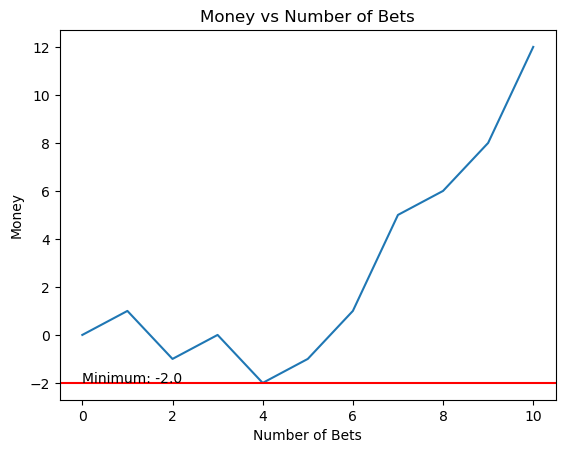

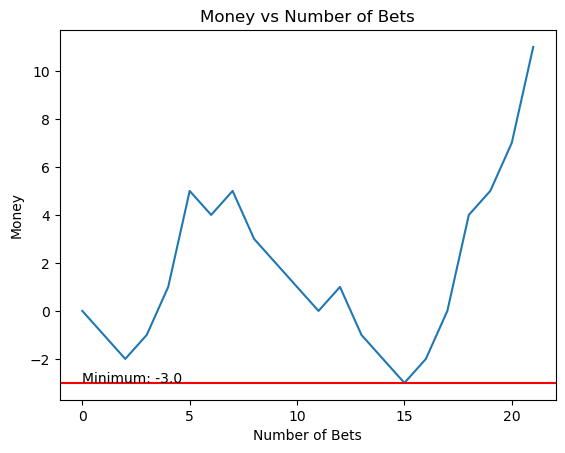

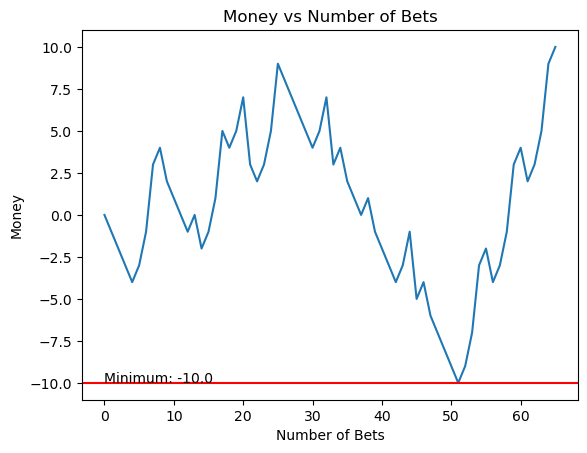

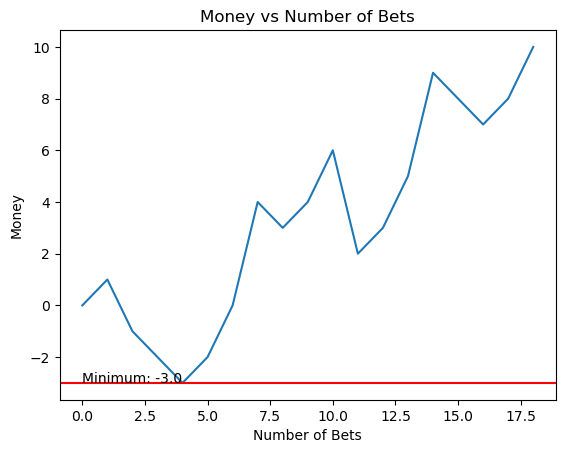

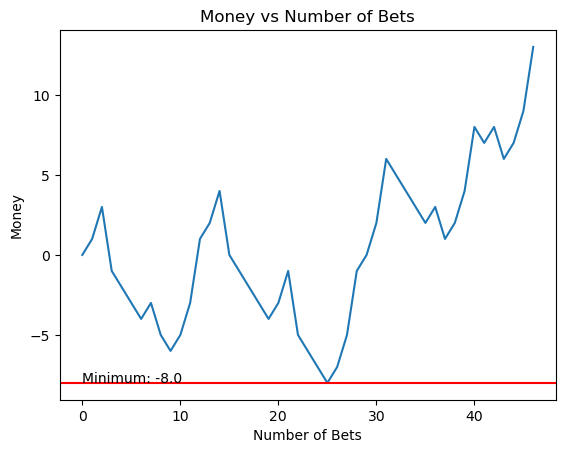

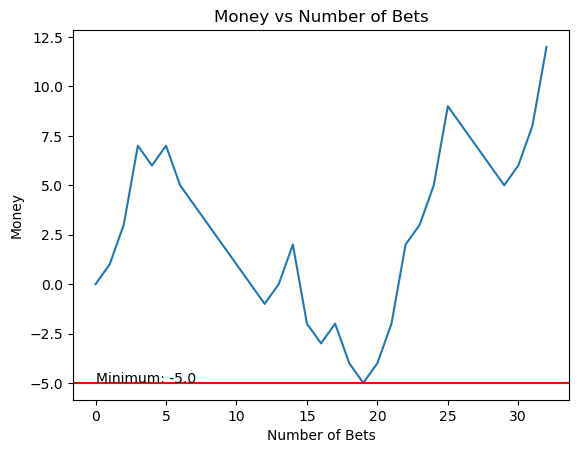

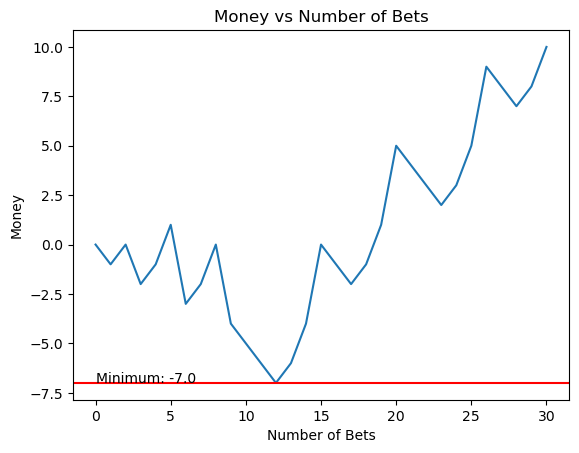

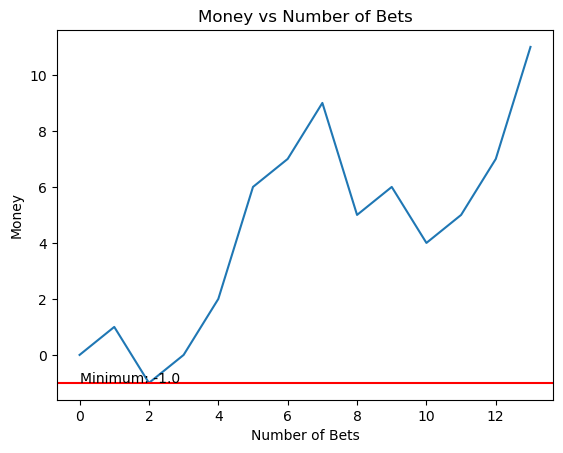

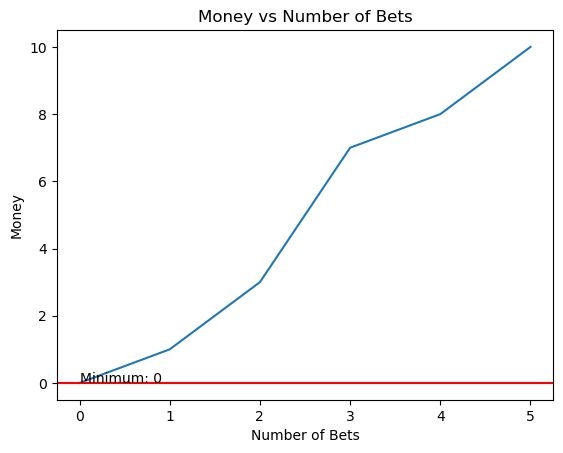

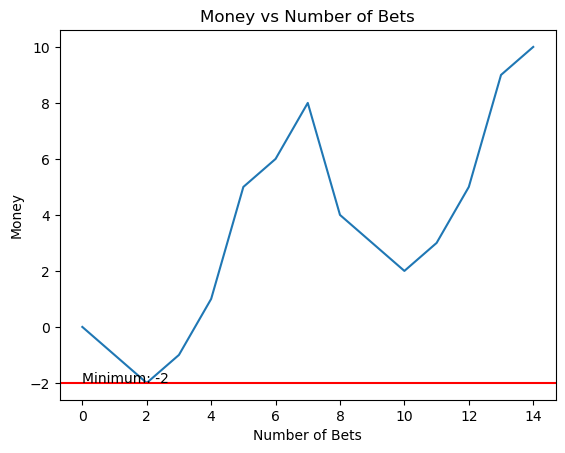

In [99]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [100]:
UNITS = 100

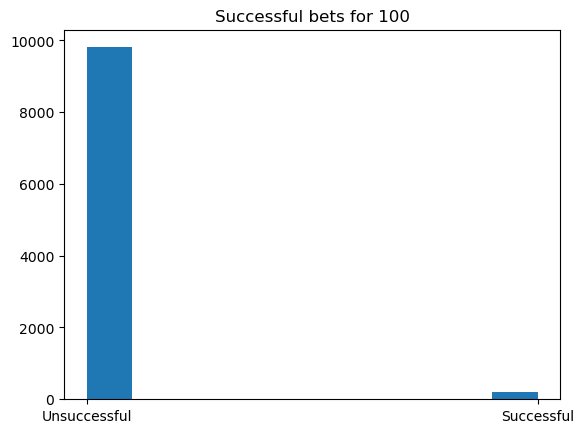

In [101]:
plot_successful_bets(money_histories[UNITS], UNITS, title=f"Successful bets for {UNITS}")

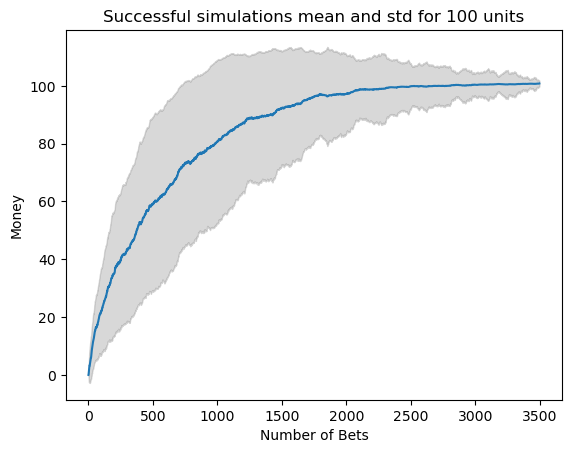

In [102]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Successful simulations mean and std for {UNITS} units')

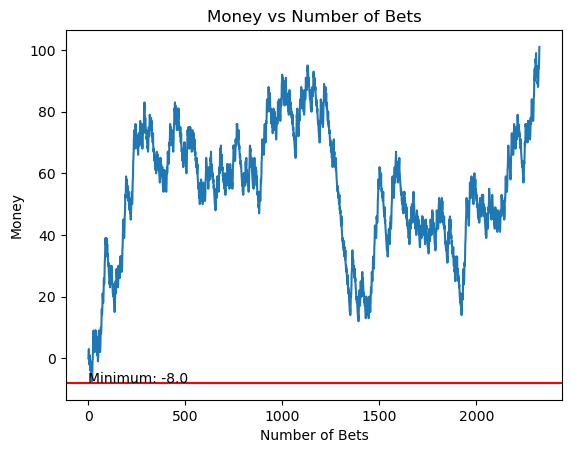

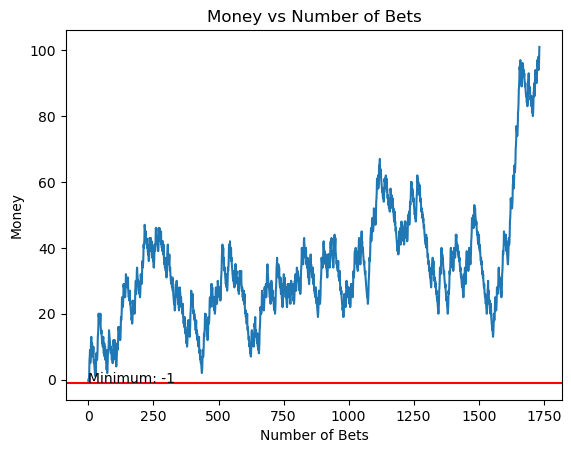

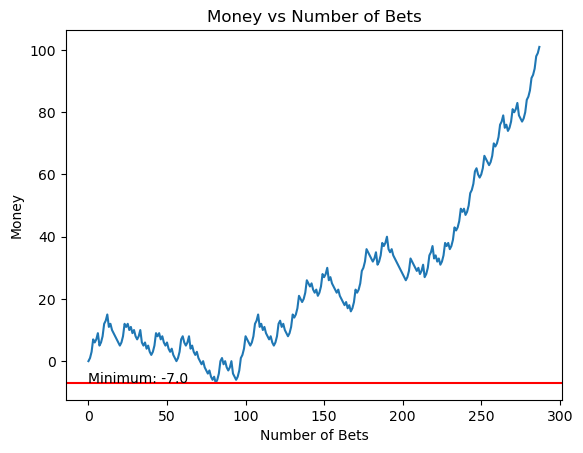

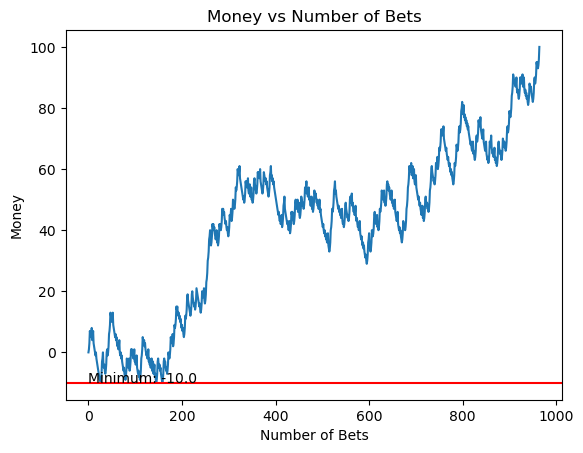

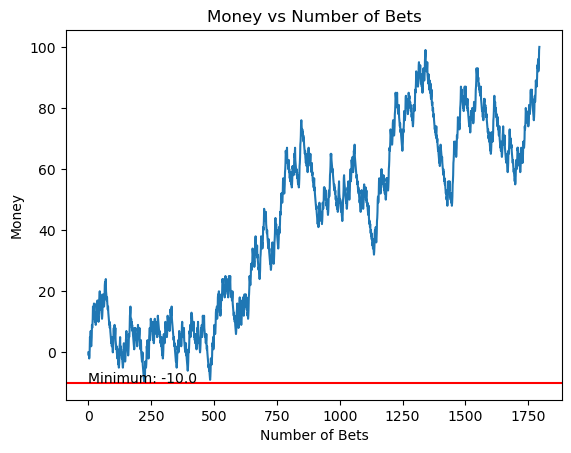

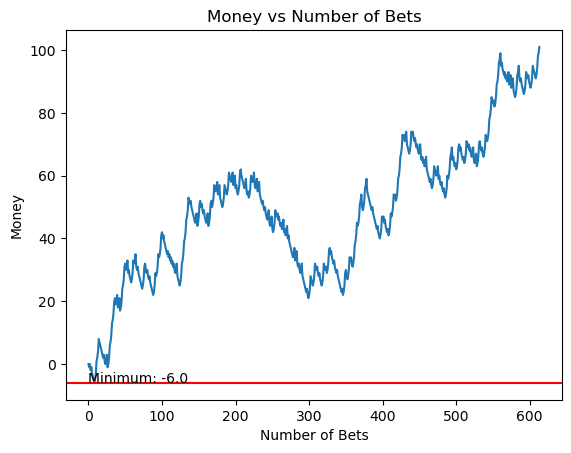

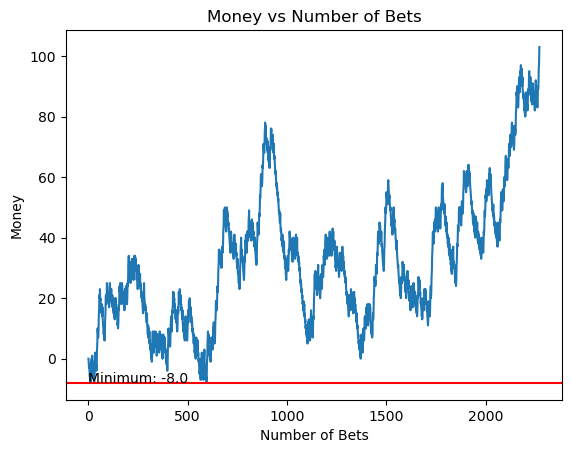

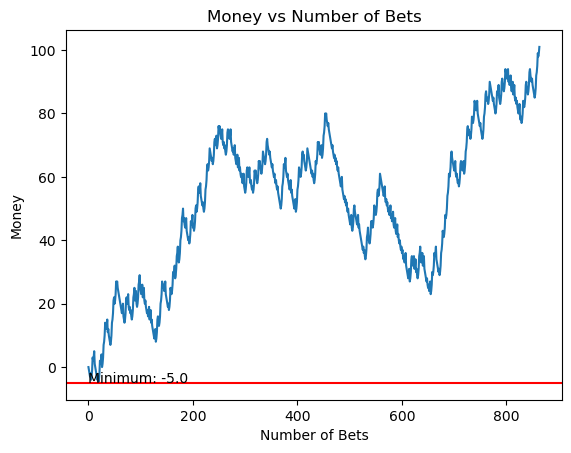

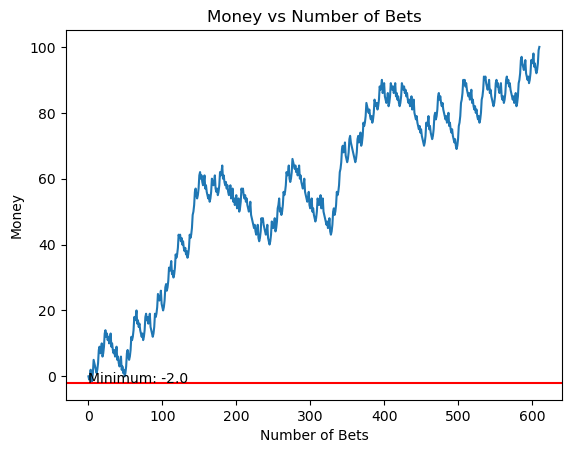

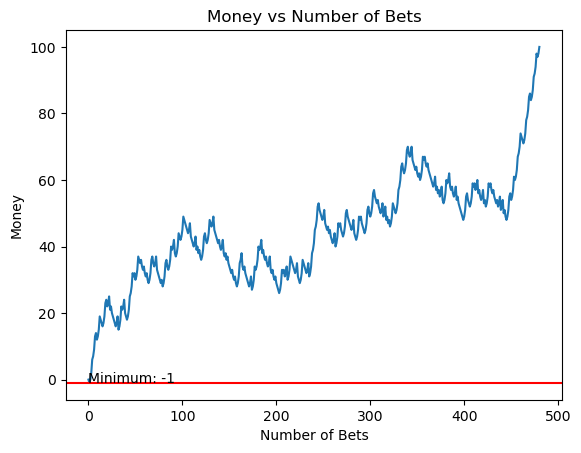

In [103]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [104]:
UNITS = 500

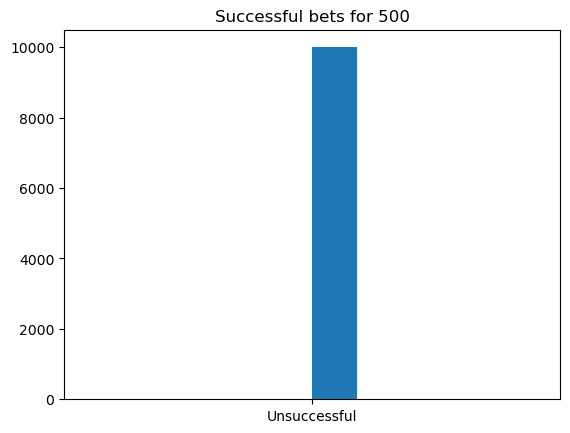

In [105]:
plot_successful_bets(money_histories[UNITS], UNITS, title=f"Successful bets for {UNITS}")

### Analysis when the goal is to win 1000 units

In [107]:
UNITS = 1000

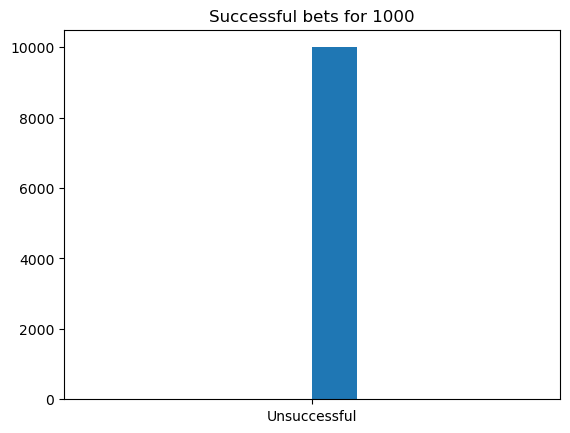

In [108]:
plot_successful_bets(money_histories[UNITS], UNITS, title=f"Successful bets for {UNITS}")

## Starting bet = goal, Allowed money lost = -10*goal

In [110]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = paroli_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -10*bet)
    money_histories = money_histories | tmp_money_histories

In [111]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [112]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
14.086405529953916
For goal 100 mean money won:
140.79963129392786
For goal 500 mean money won:
704.3913093459018
For goal 1000 mean money won:
1408.0831408775982


### Analysis when the goal is to win 10 units

In [113]:
UNITS = 10

In [114]:
len(successful_histories[UNITS])

8680

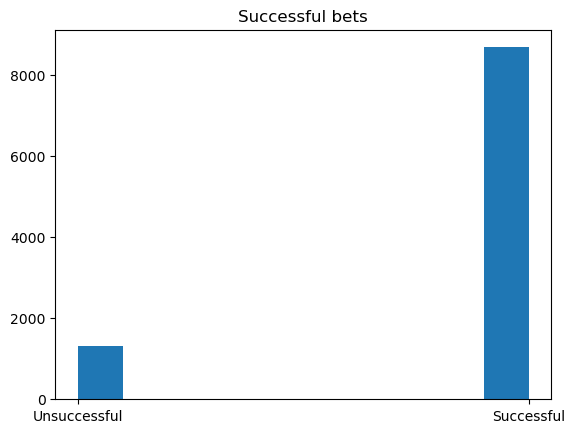

In [115]:
plot_successful_bets(money_histories[UNITS], UNITS)

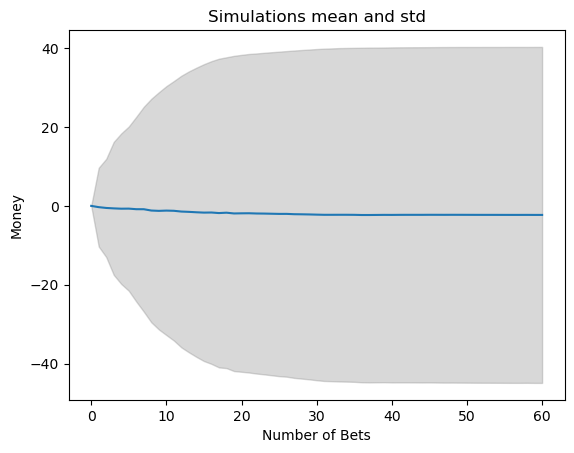

In [116]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

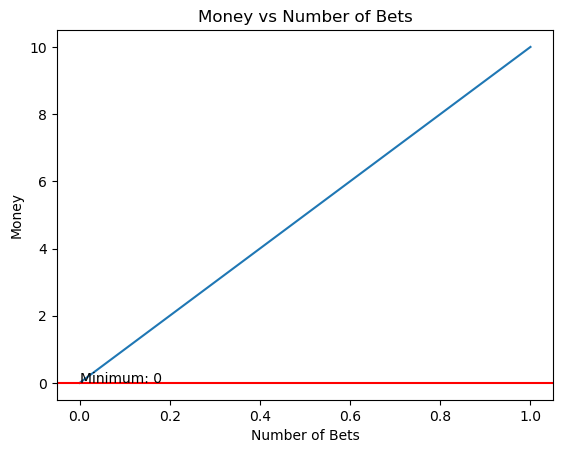

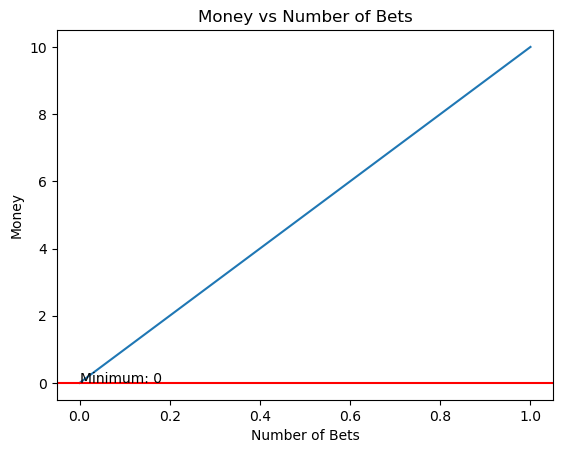

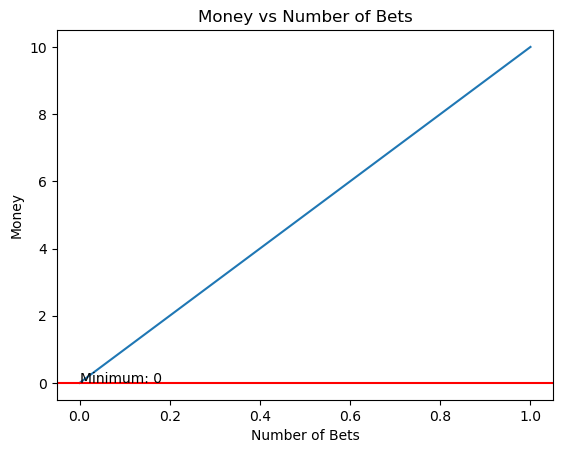

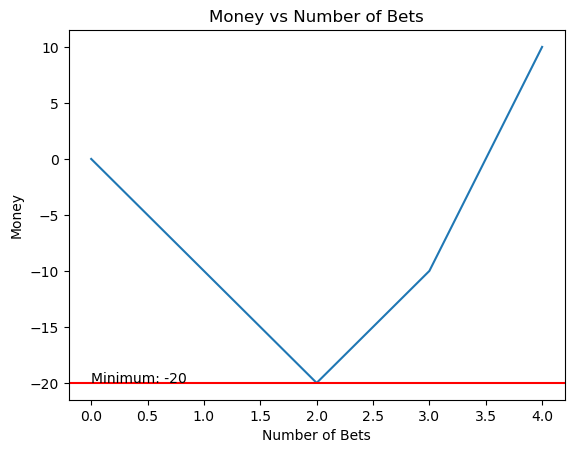

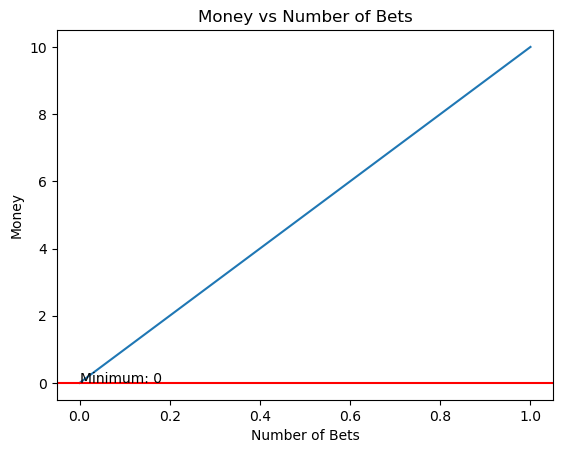

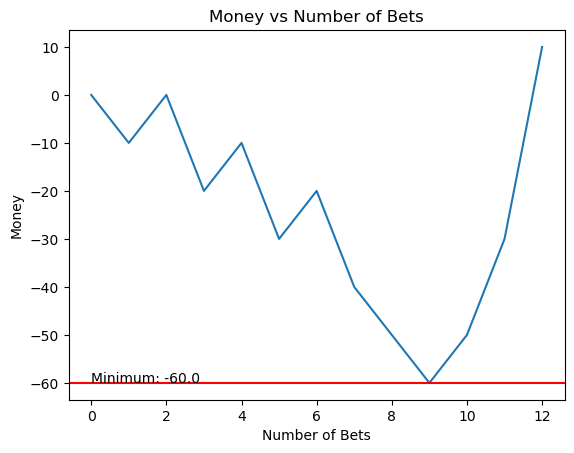

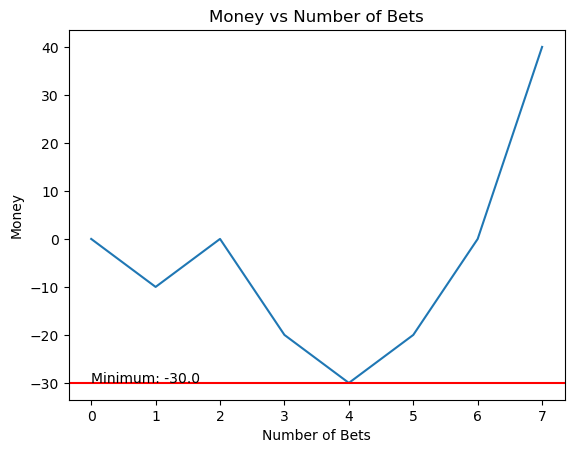

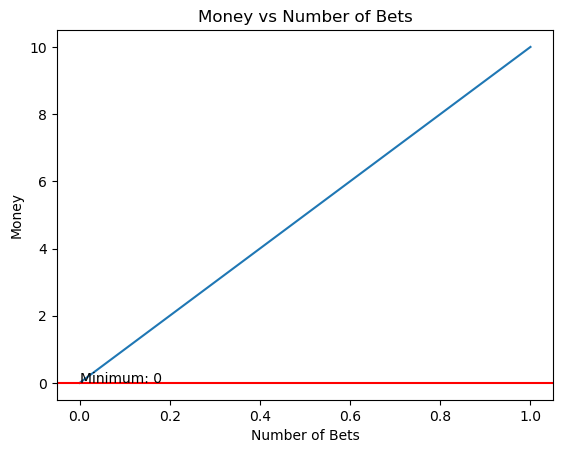

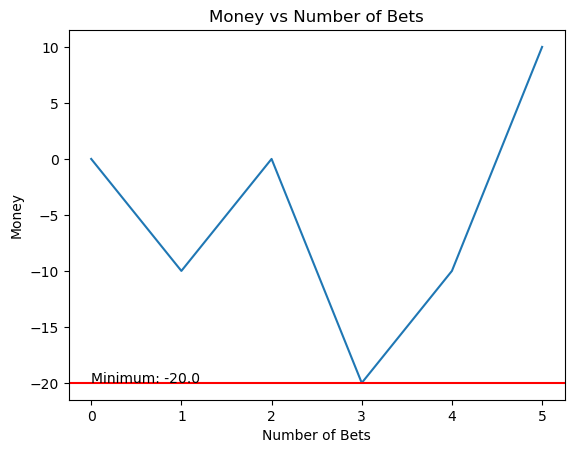

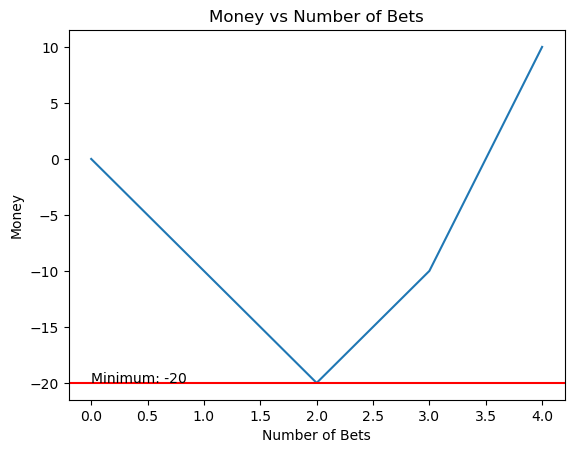

In [117]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [118]:
UNITS = 100

In [119]:
len(successful_histories[UNITS])

8679

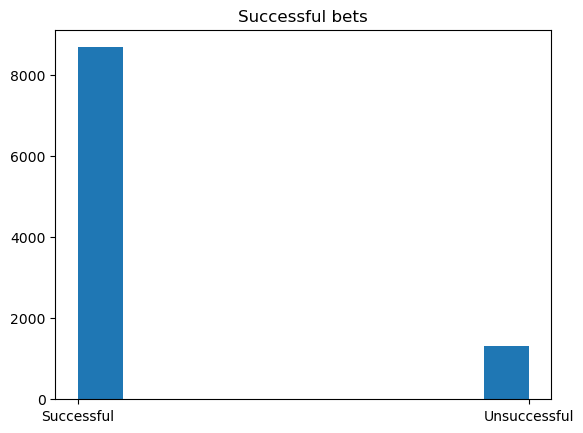

In [120]:
plot_successful_bets(money_histories[UNITS], UNITS)

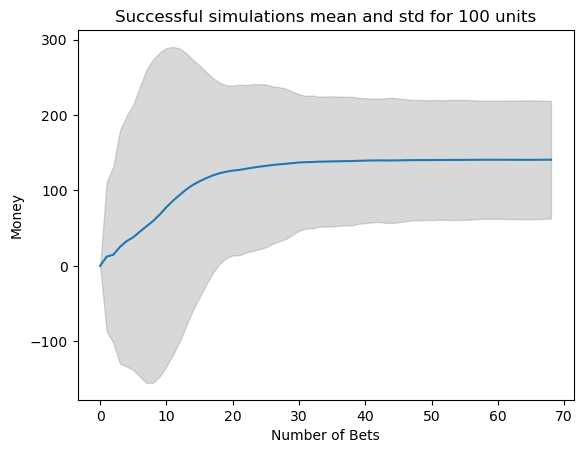

In [121]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Successful simulations mean and std for {UNITS} units')

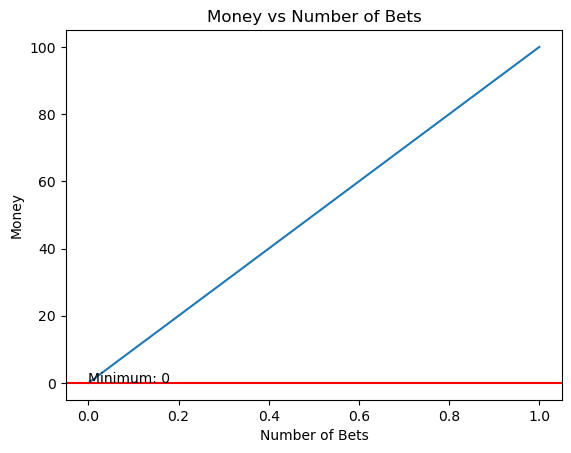

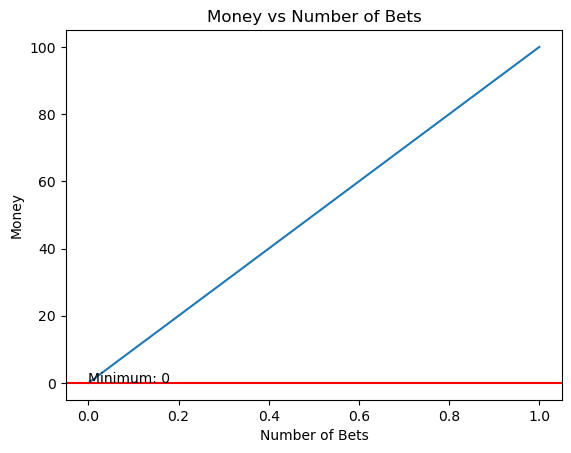

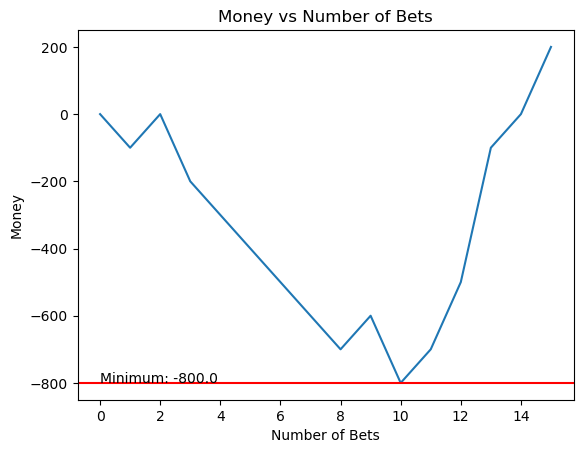

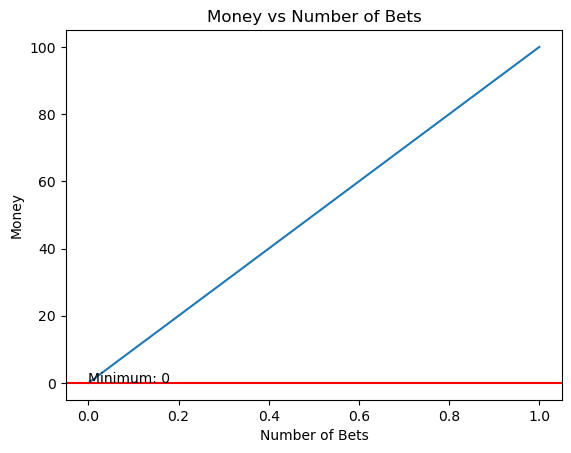

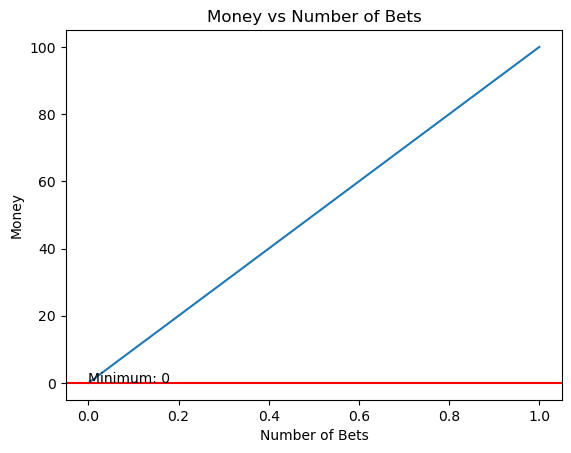

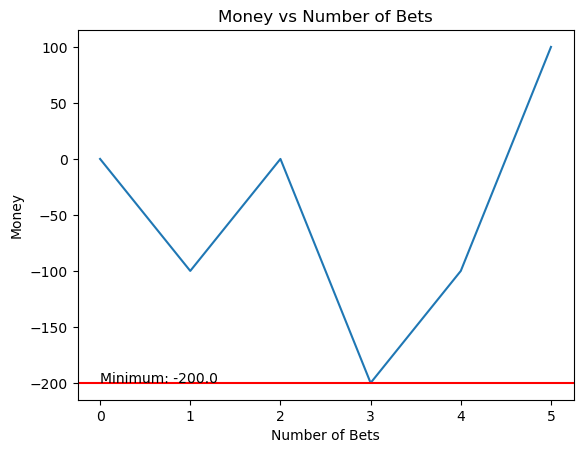

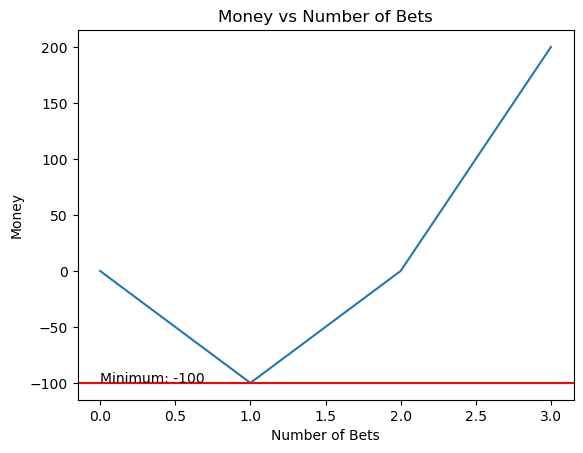

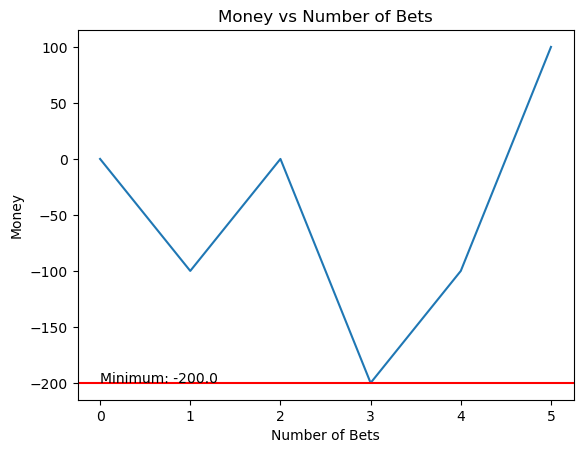

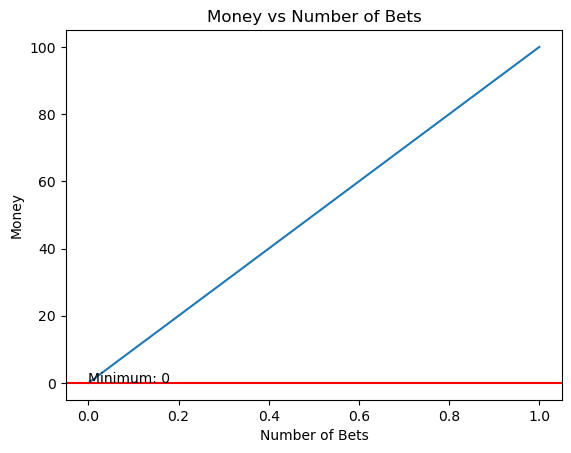

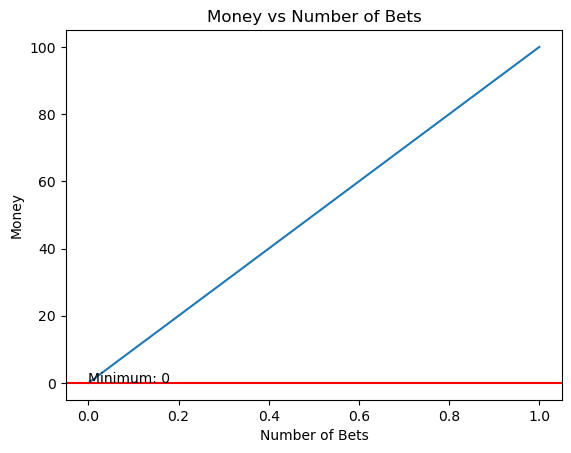

In [122]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [123]:
UNITS = 500

In [124]:
len(successful_histories[UNITS])

8699

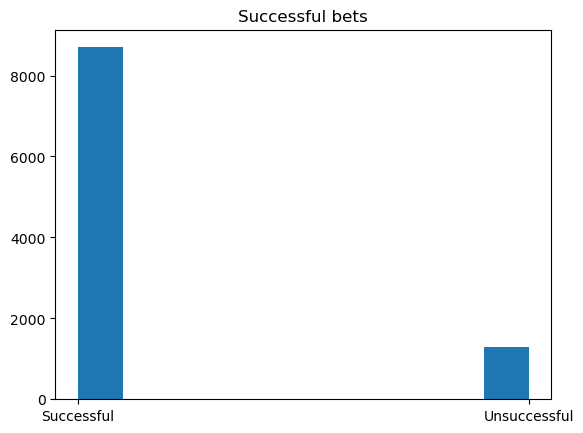

In [125]:
plot_successful_bets(money_histories[UNITS], UNITS)

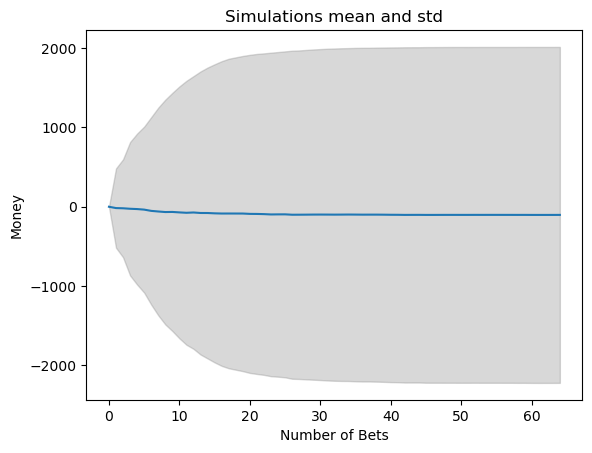

In [126]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

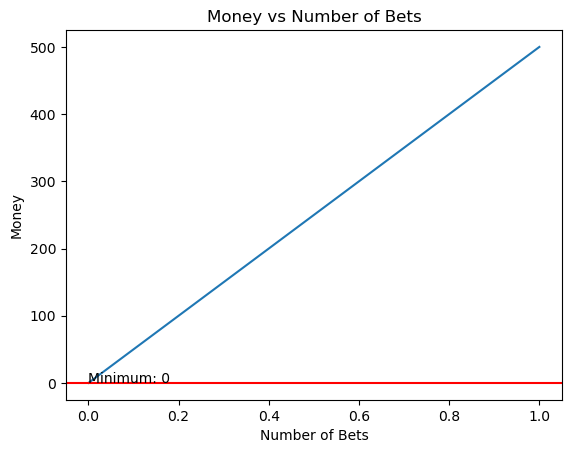

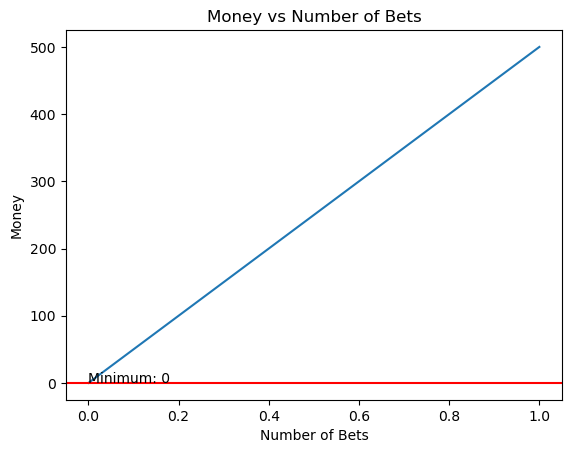

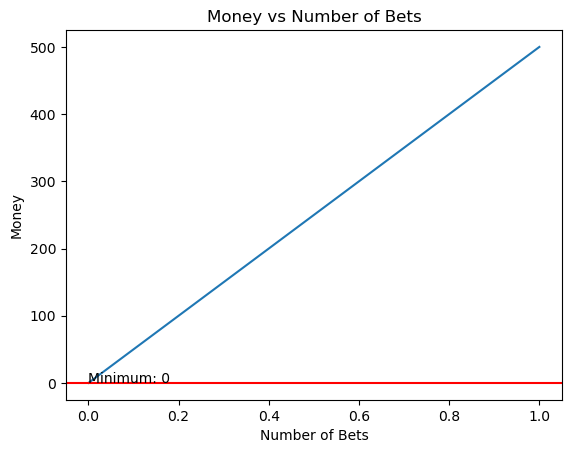

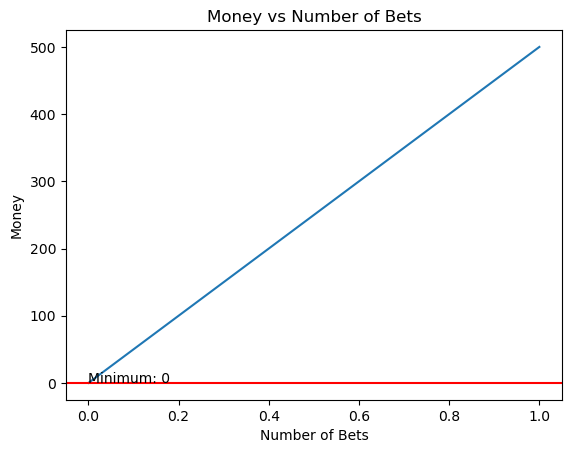

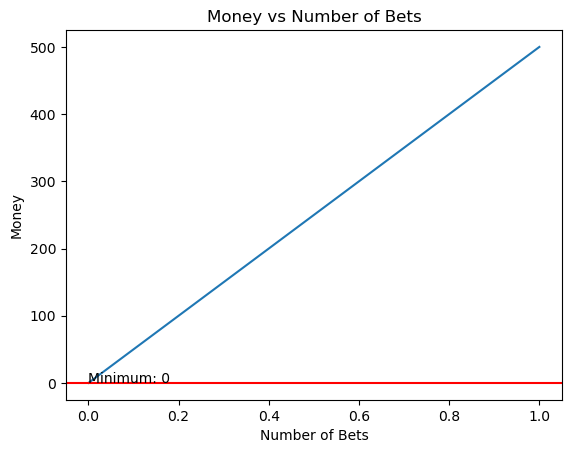

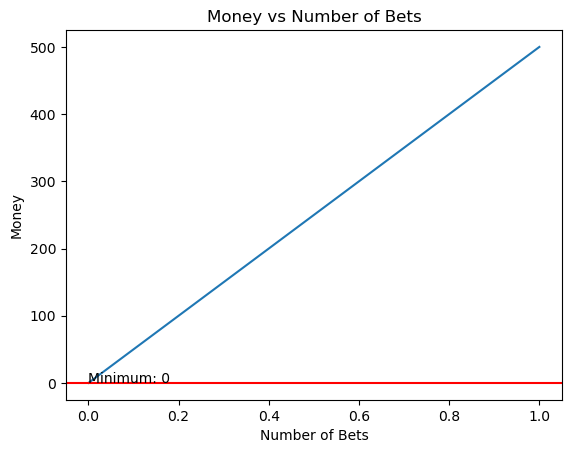

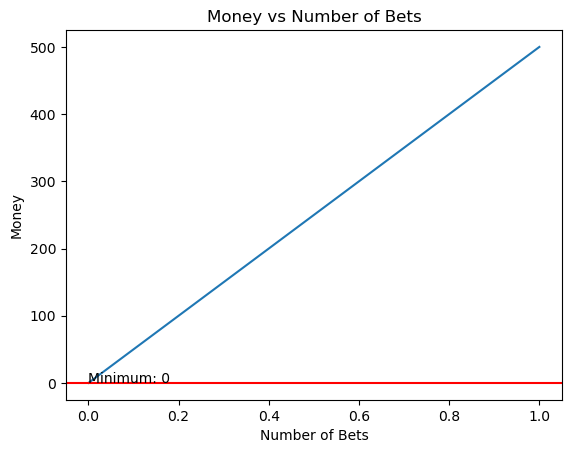

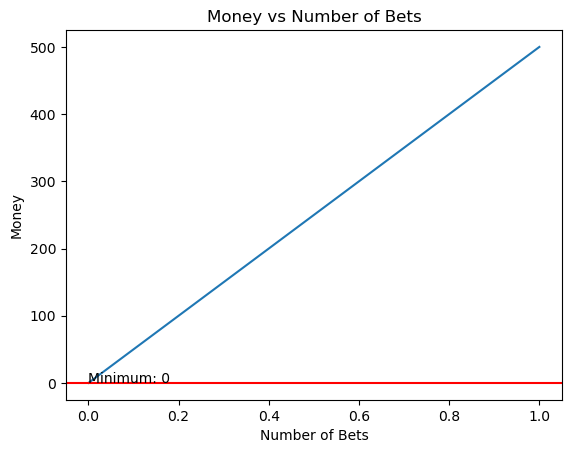

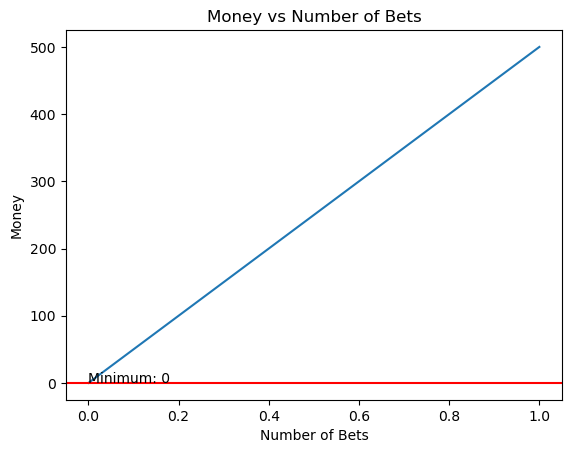

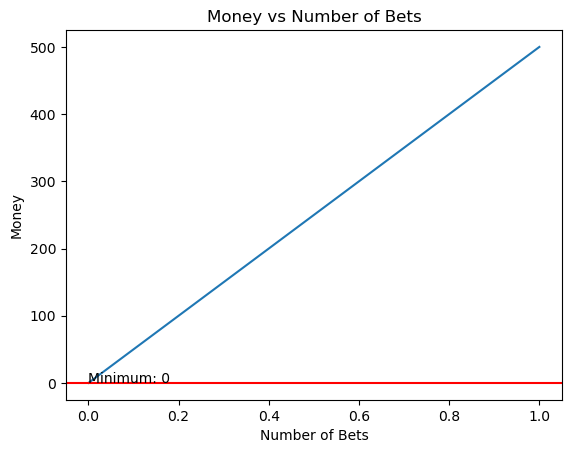

In [127]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [128]:
UNITS = 1000

In [129]:
len(successful_histories[UNITS])

8660

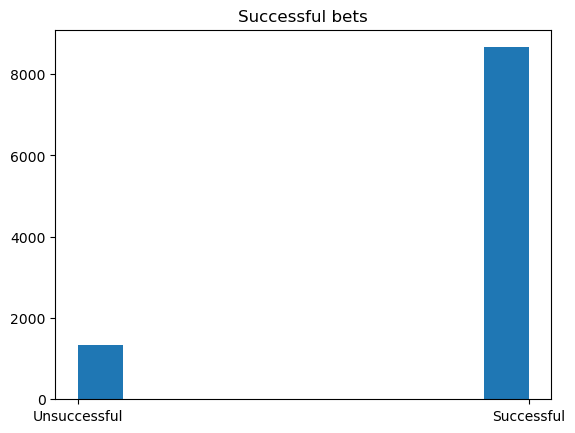

In [130]:
plot_successful_bets(money_histories[UNITS], UNITS)

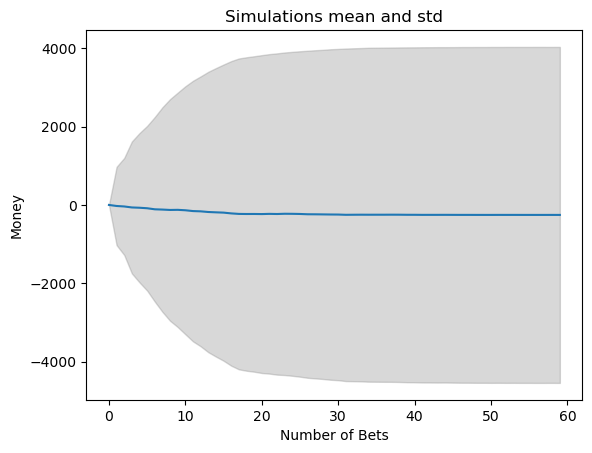

In [131]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

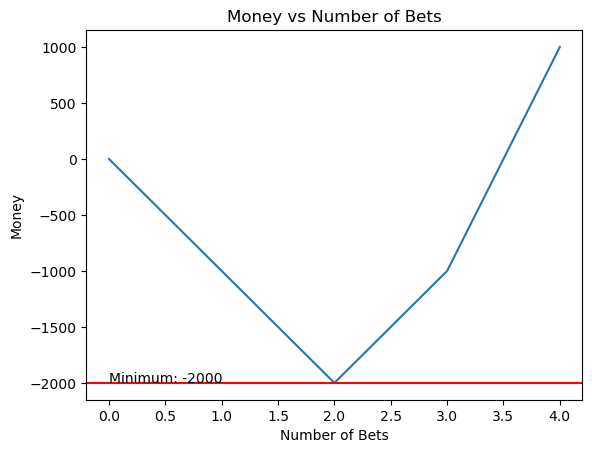

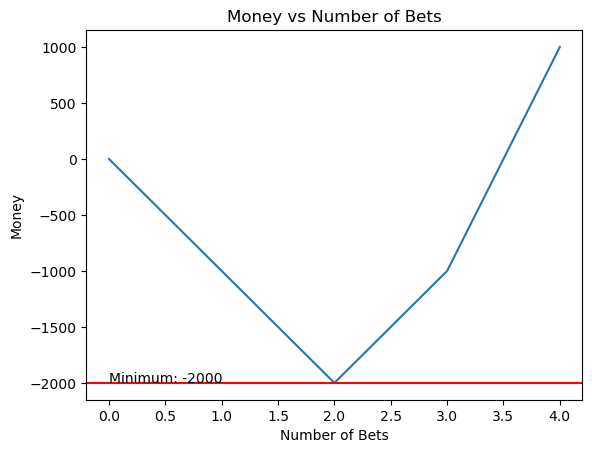

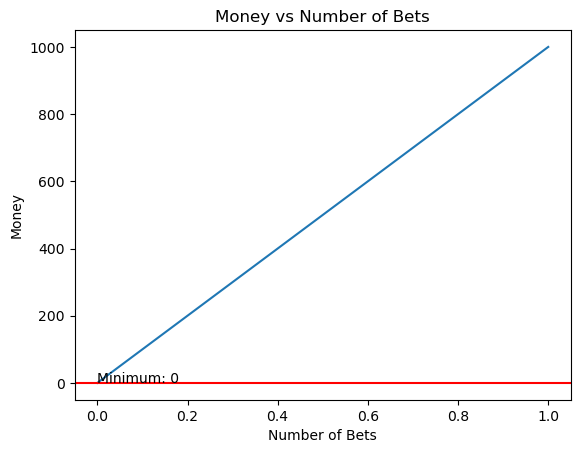

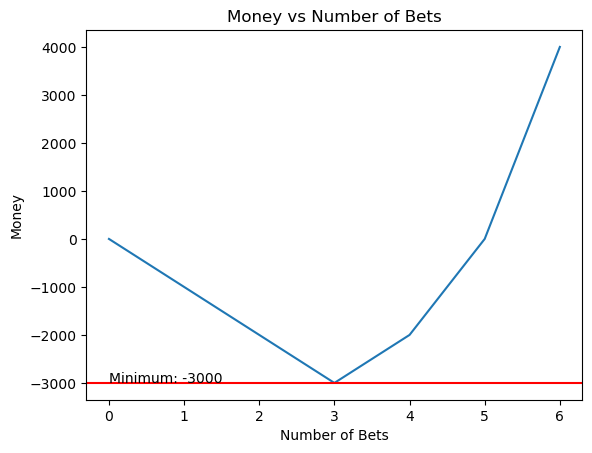

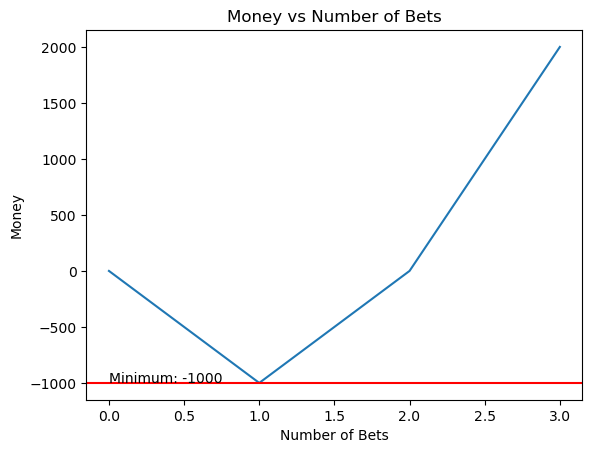

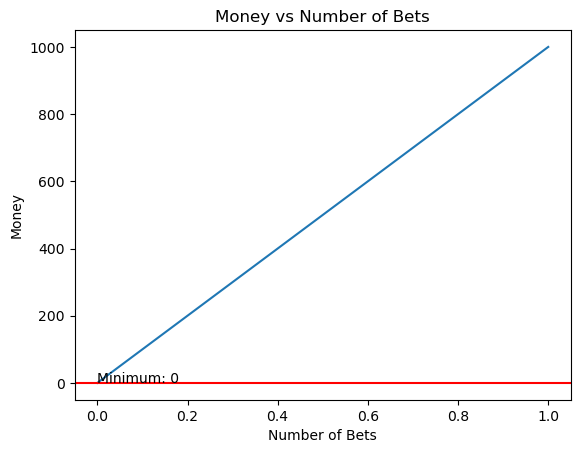

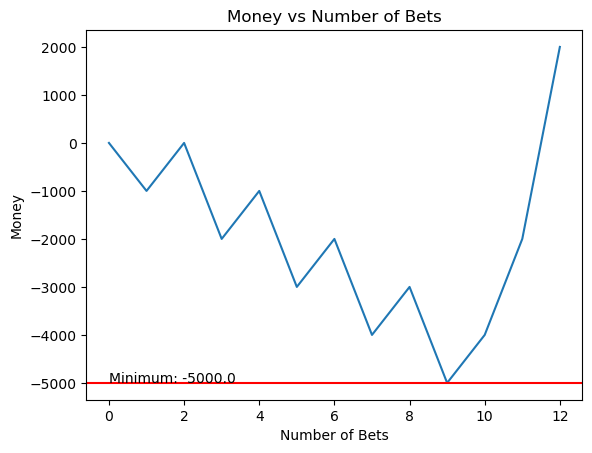

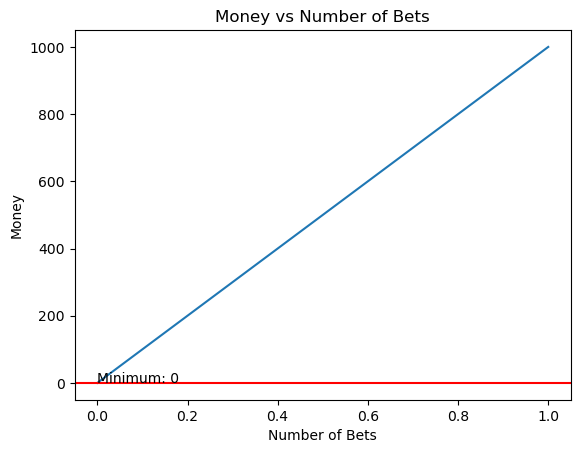

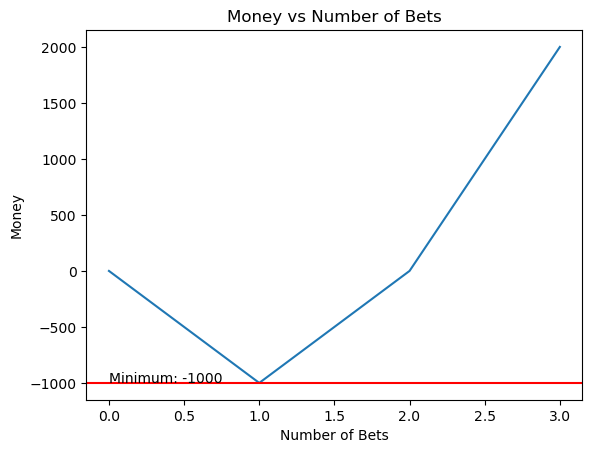

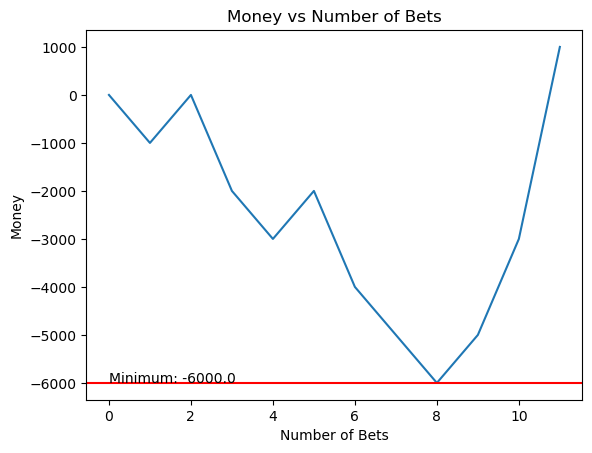

In [132]:
plot_money_histories(successful_histories, UNITS)

## Starting bet = goal, Allowed money lost = -20*goal

In [133]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = paroli_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -20*bet)
    money_histories = money_histories | tmp_money_histories

In [134]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [135]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
14.155121631940657
For goal 100 mean money won:
142.35922012852632
For goal 500 mean money won:
720.9731725860759
For goal 1000 mean money won:
1435.7942807437207


### Analysis when the goal is to win 10 units

In [136]:
UNITS = 10

In [137]:
len(successful_histories[UNITS])

9167

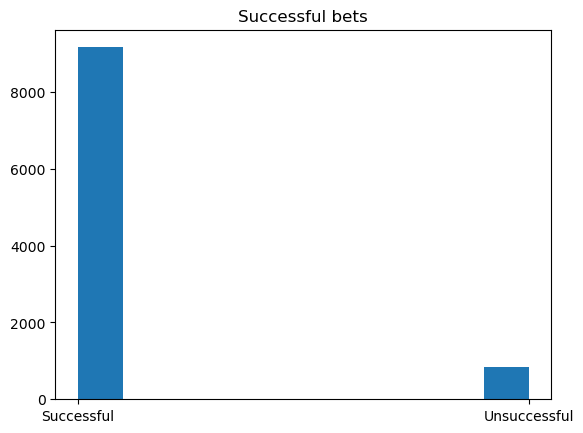

In [138]:
plot_successful_bets(money_histories[UNITS], UNITS)

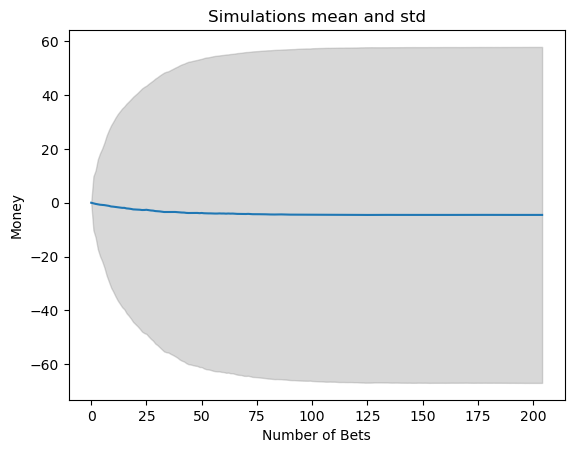

In [139]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

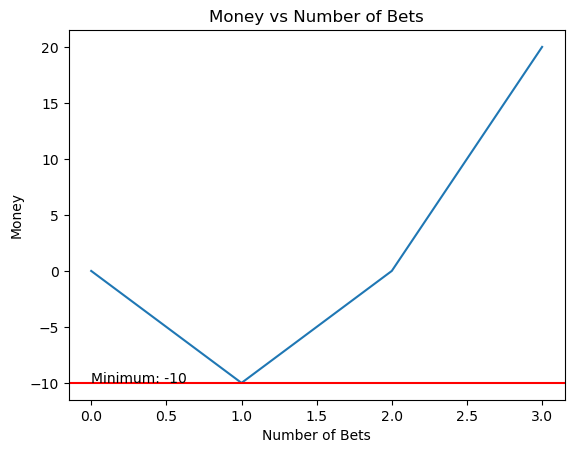

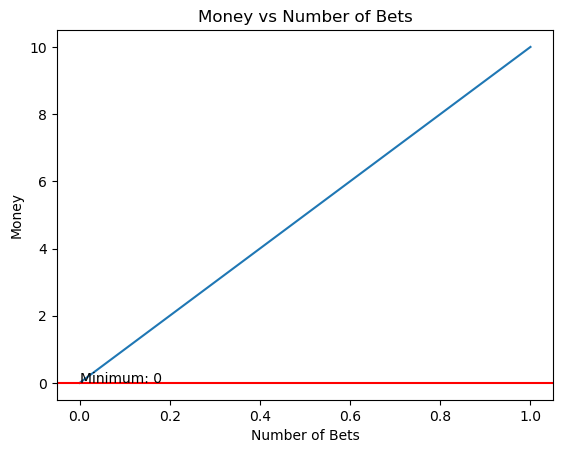

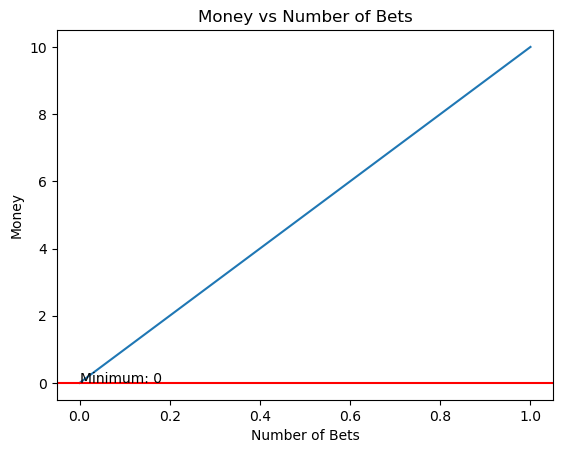

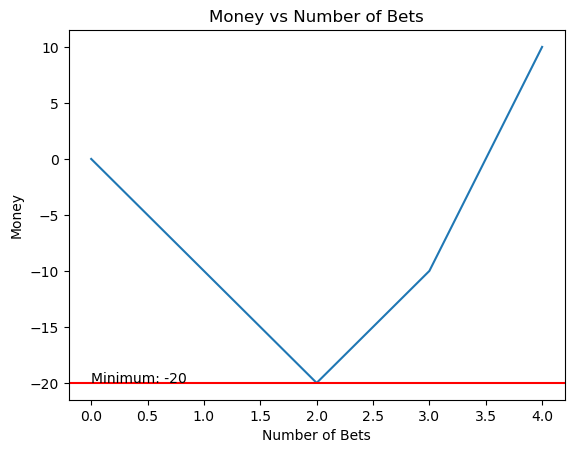

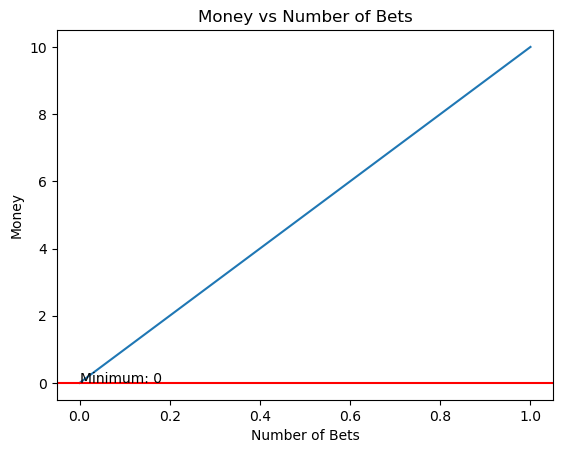

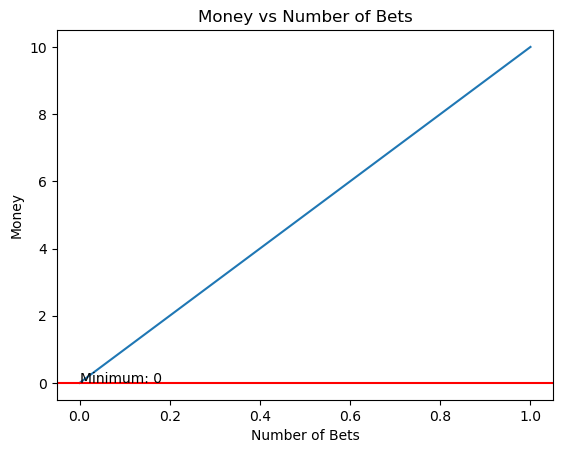

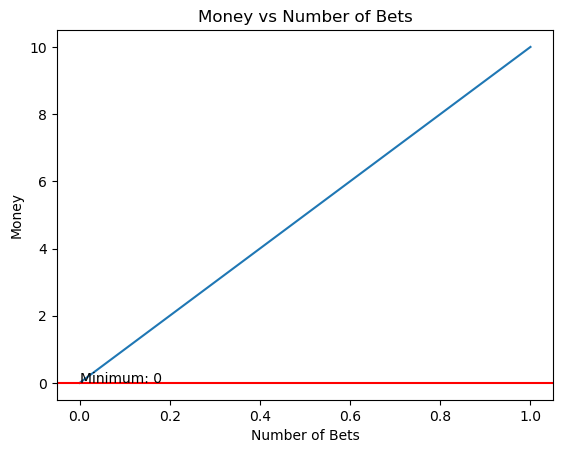

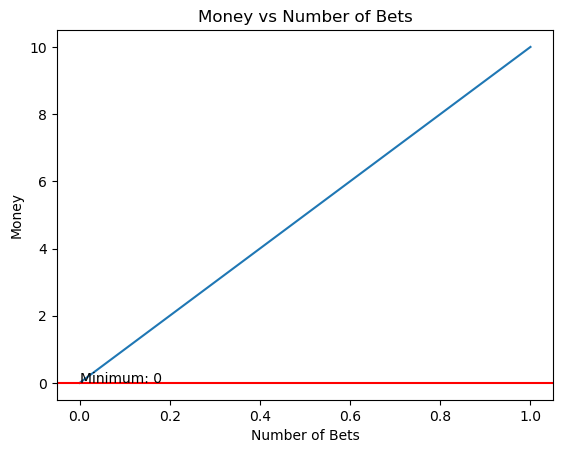

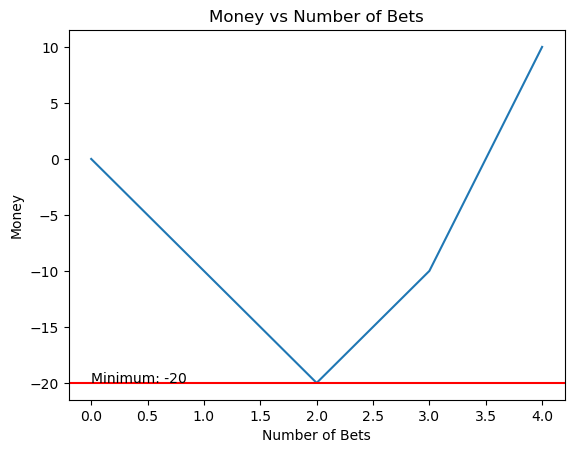

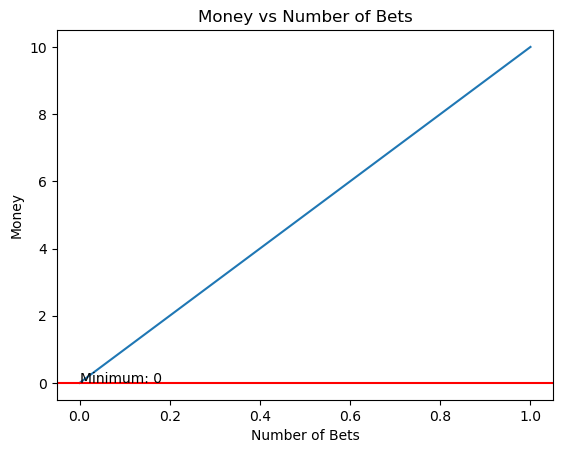

In [140]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [141]:
UNITS = 100

In [142]:
len(successful_histories[UNITS])

9181

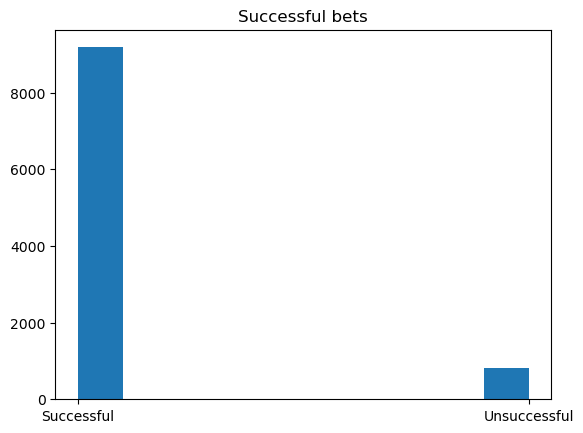

In [143]:
plot_successful_bets(money_histories[UNITS], UNITS)

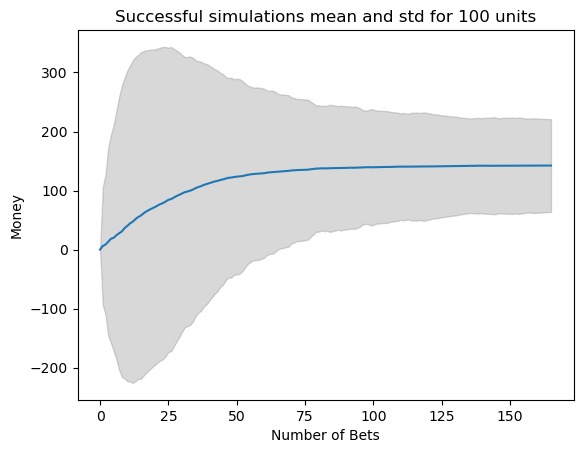

In [144]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Successful simulations mean and std for {UNITS} units')

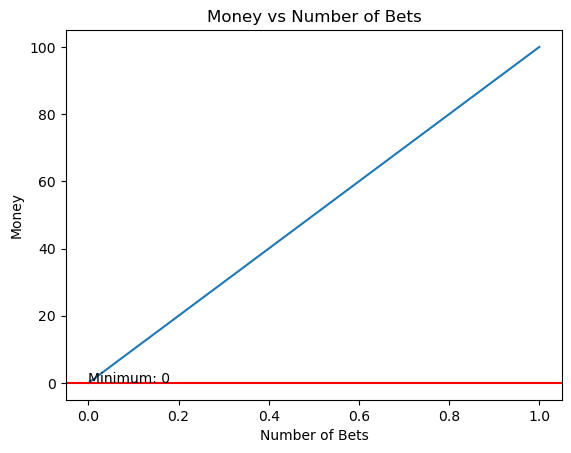

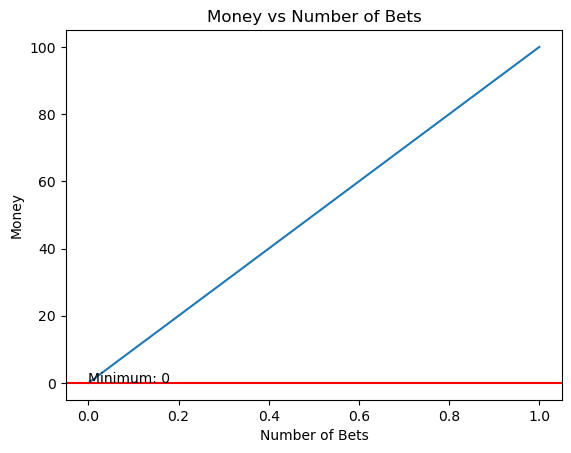

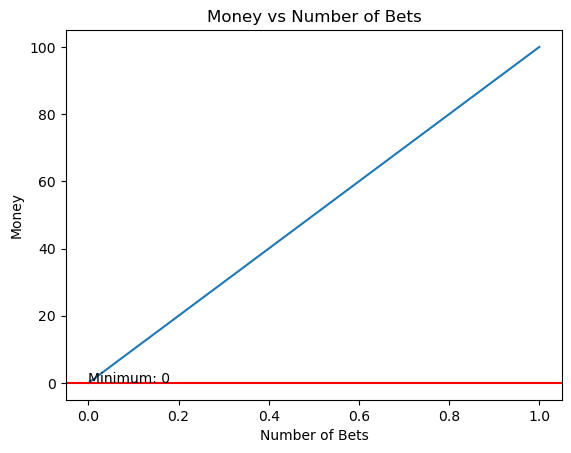

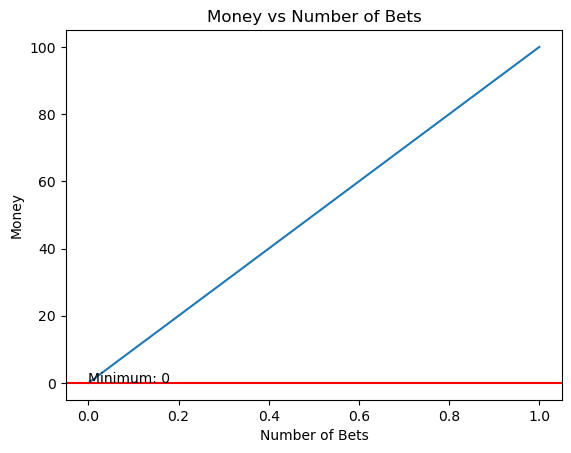

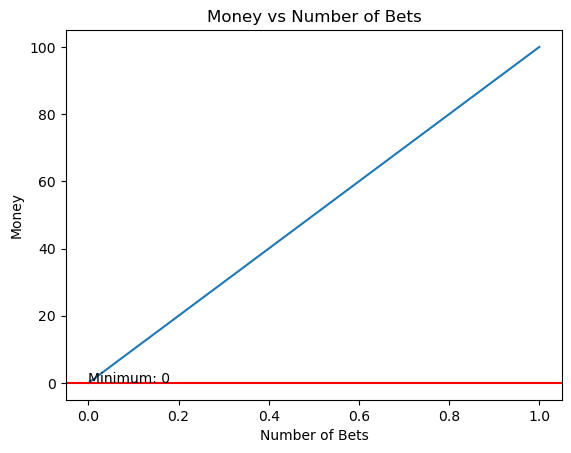

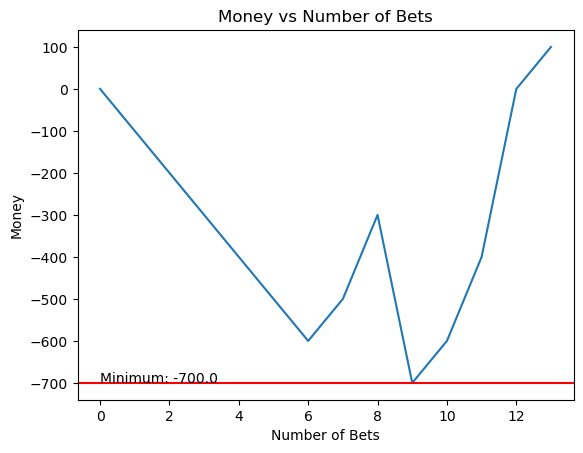

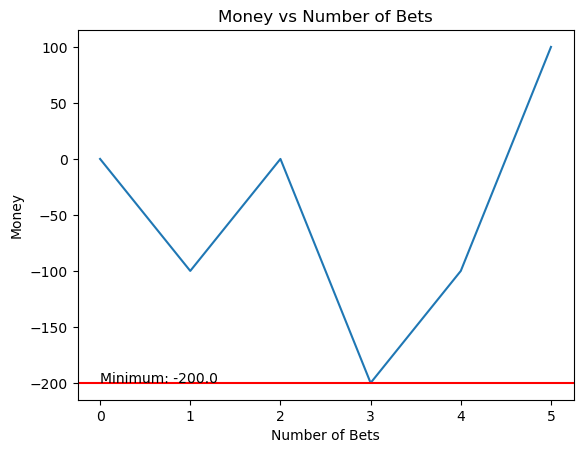

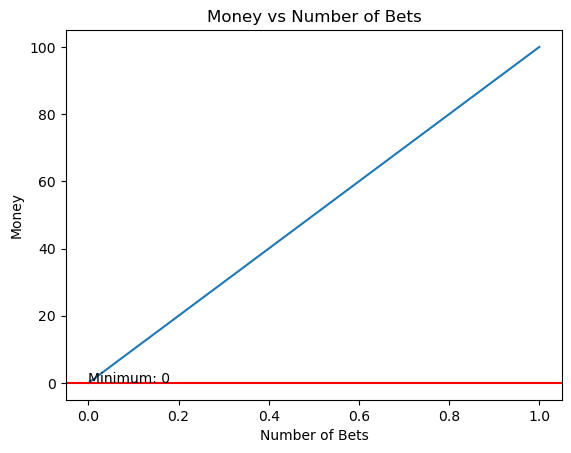

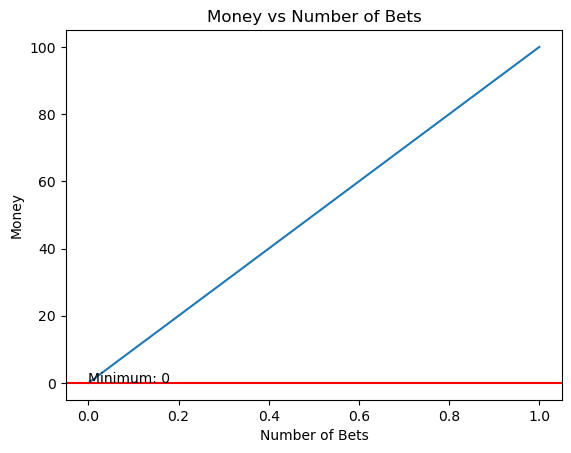

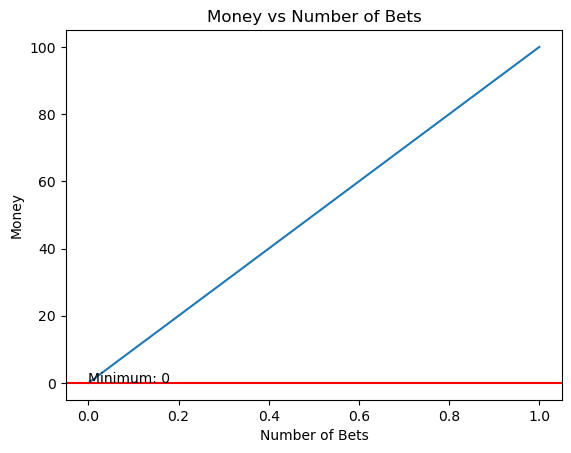

In [145]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [146]:
UNITS = 500

In [147]:
len(successful_histories[UNITS])

9207

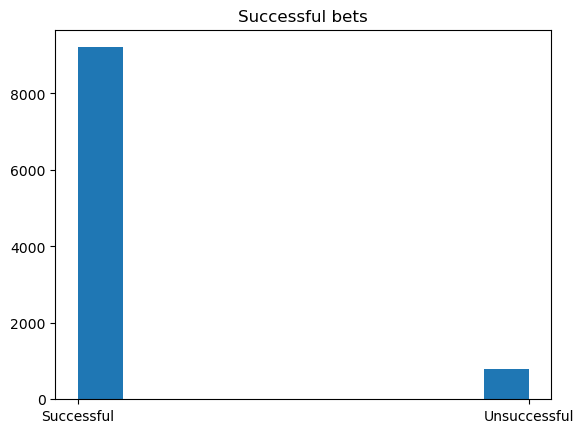

In [148]:
plot_successful_bets(money_histories[UNITS], UNITS)

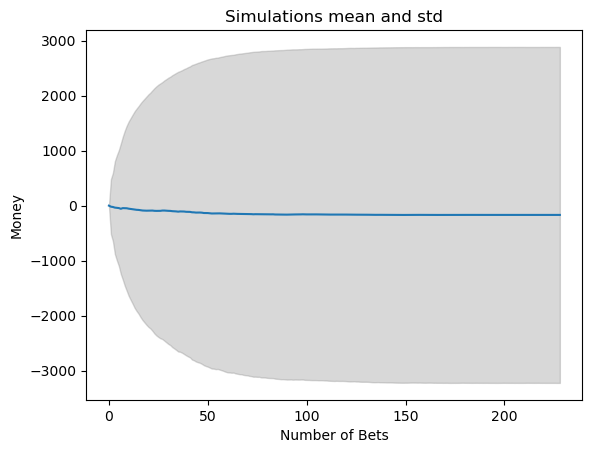

In [149]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

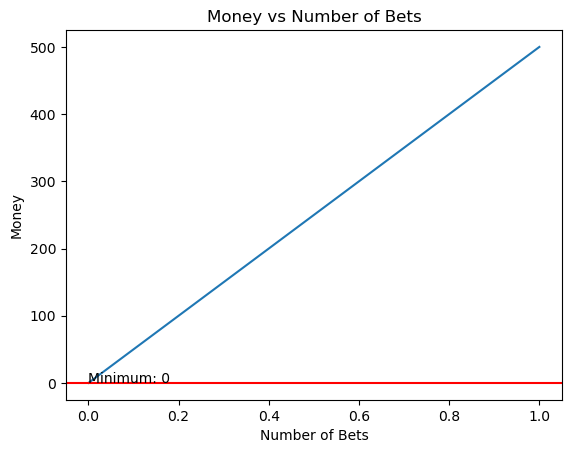

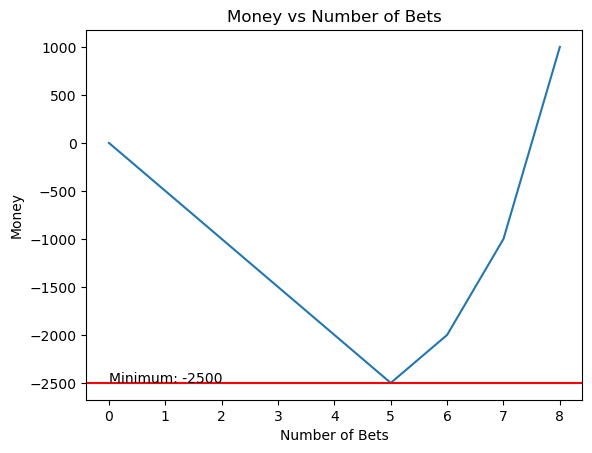

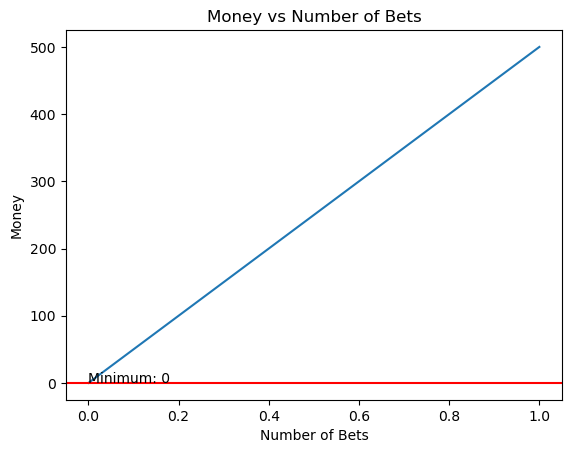

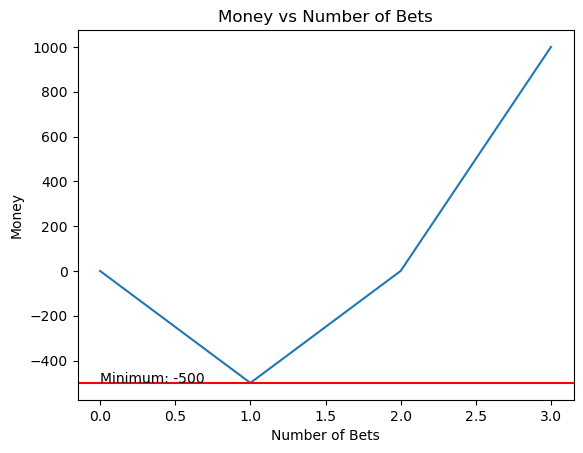

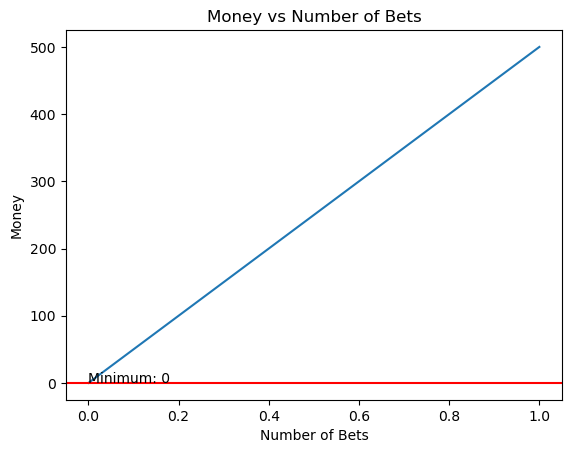

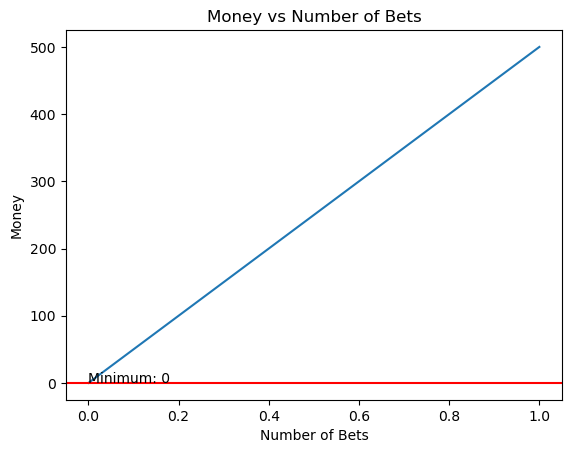

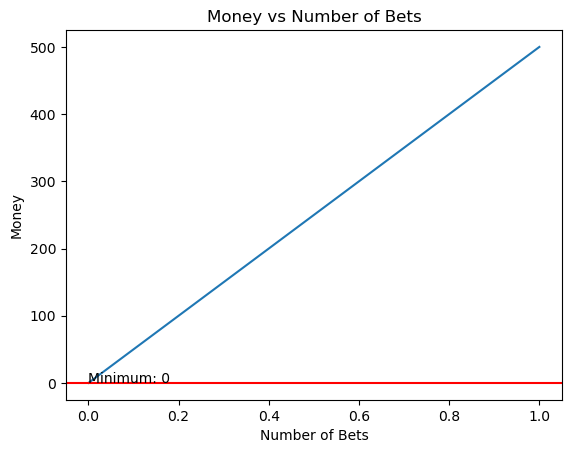

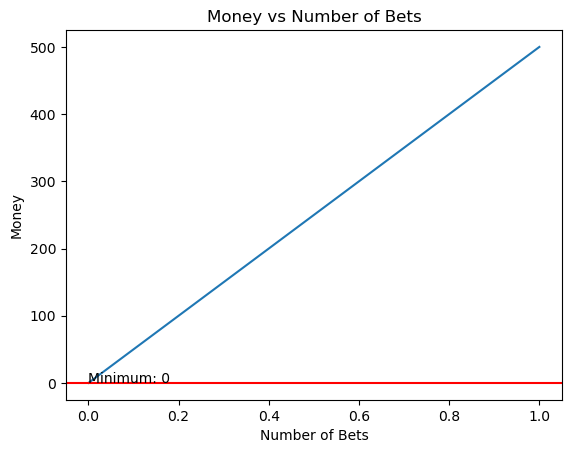

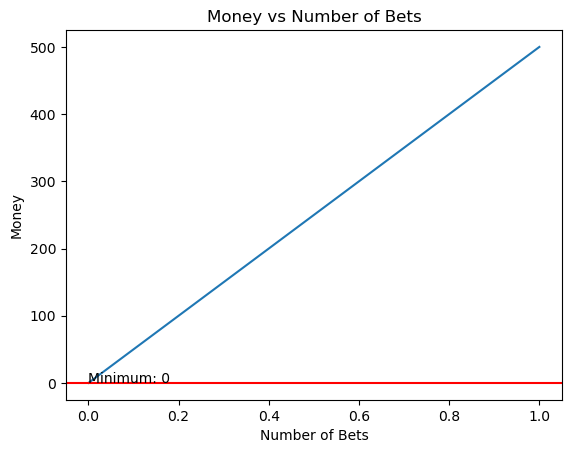

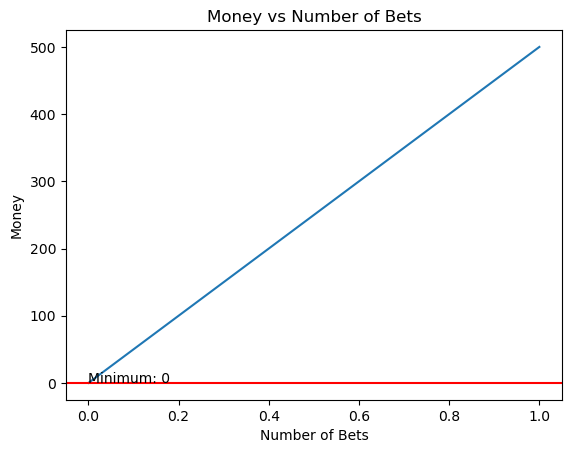

In [150]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [151]:
UNITS = 1000

In [152]:
len(successful_histories[UNITS])

9197

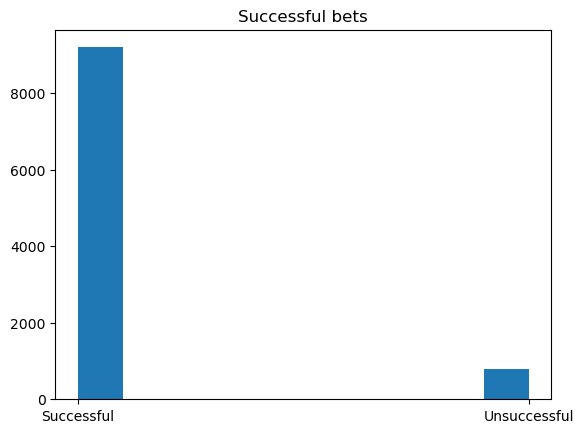

In [153]:
plot_successful_bets(money_histories[UNITS], UNITS)

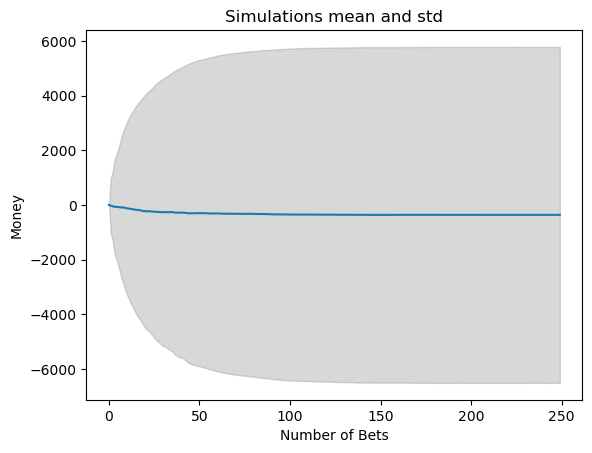

In [154]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

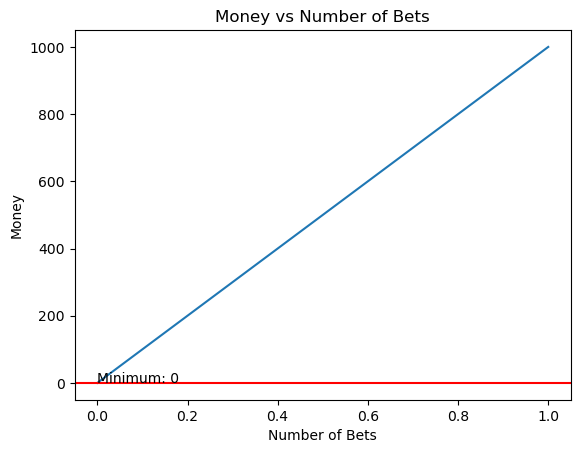

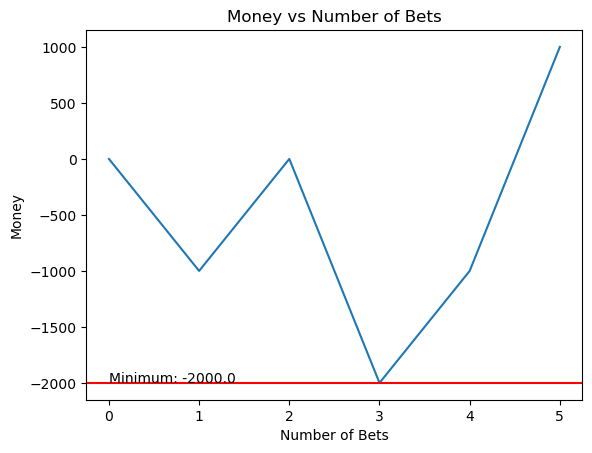

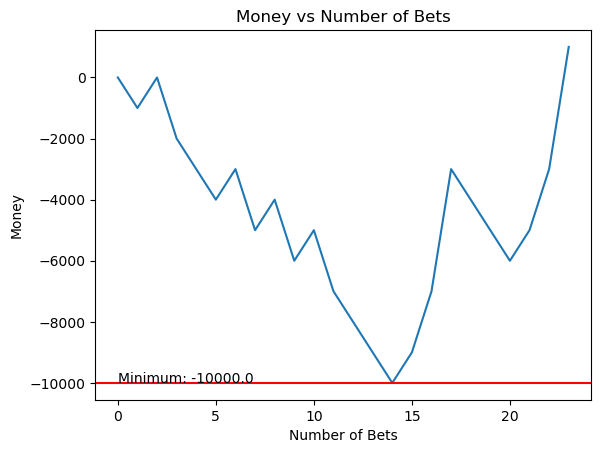

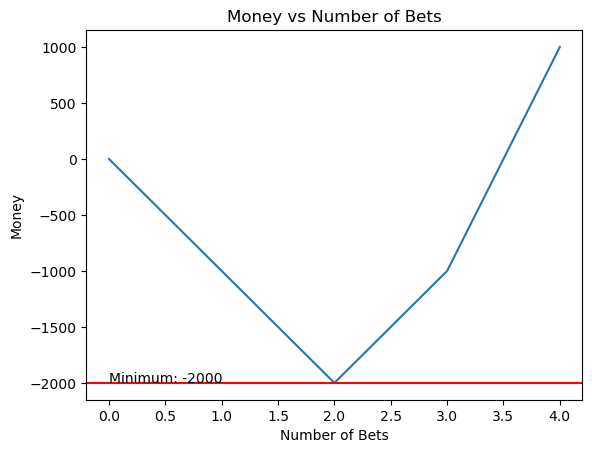

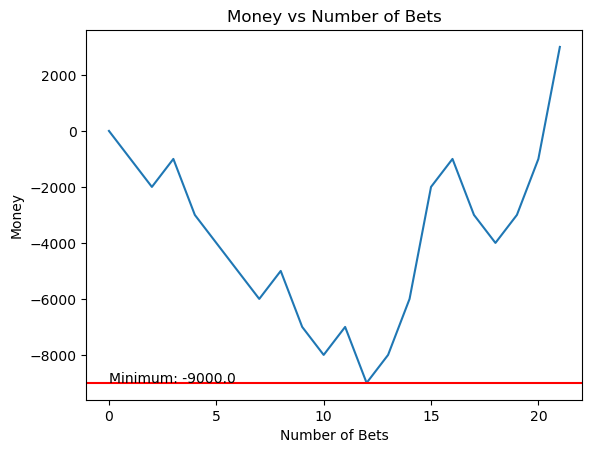

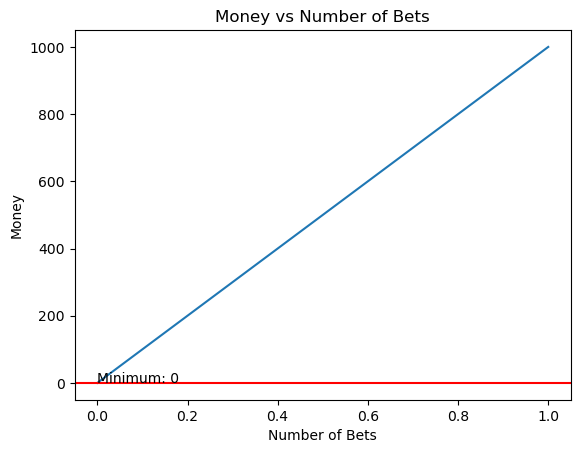

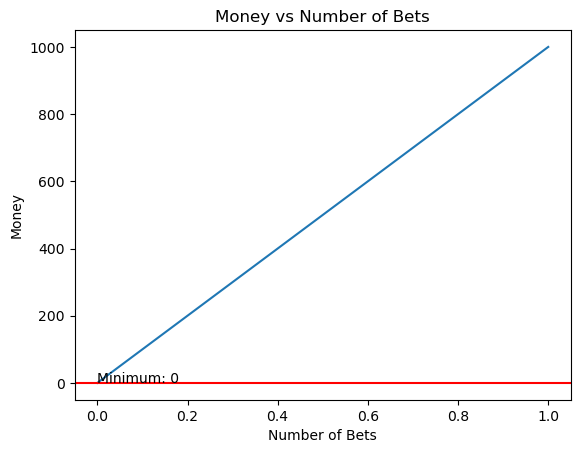

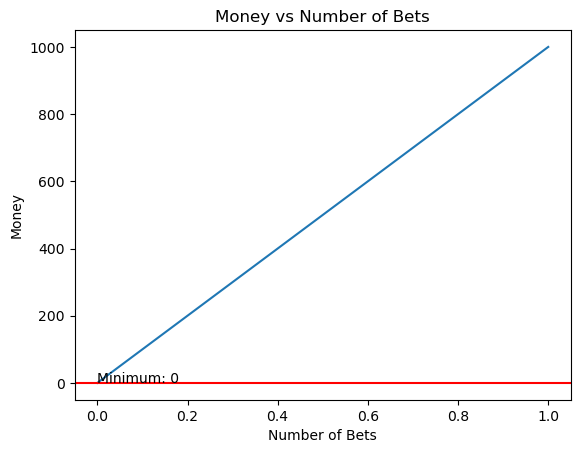

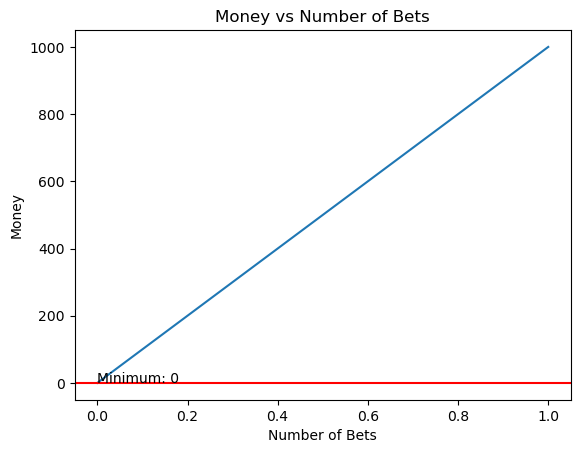

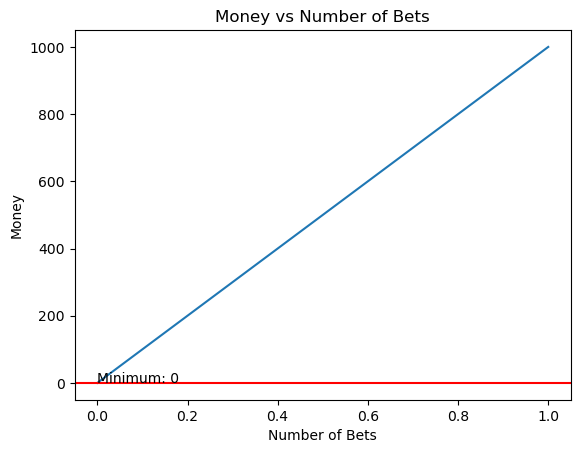

In [155]:
plot_money_histories(successful_histories, UNITS)

## Starting bet = goal, Allowed money lost = -30*goal

In [156]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = paroli_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -30*bet)
    money_histories = money_histories | tmp_money_histories

In [157]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [158]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
14.34000642329515
For goal 100 mean money won:
144.52640581569383
For goal 500 mean money won:
724.7149099435148
For goal 1000 mean money won:
1439.1494817822418


### Analysis when the goal is to win 10 units

In [159]:
UNITS = 10

In [160]:
len(successful_histories[UNITS])

9341

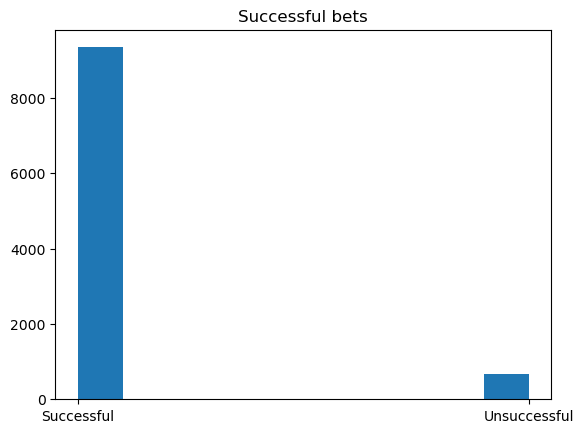

In [161]:
plot_successful_bets(money_histories[UNITS], UNITS)

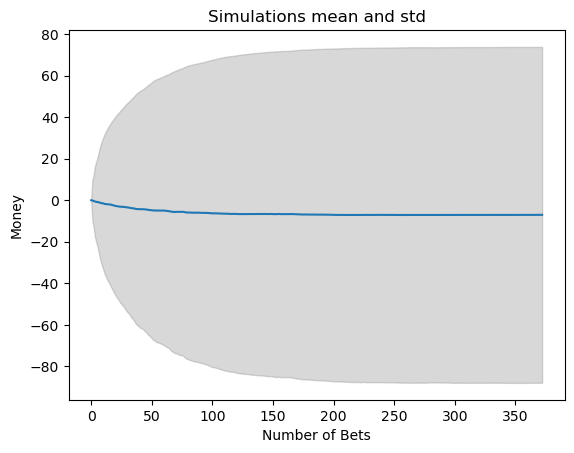

In [162]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

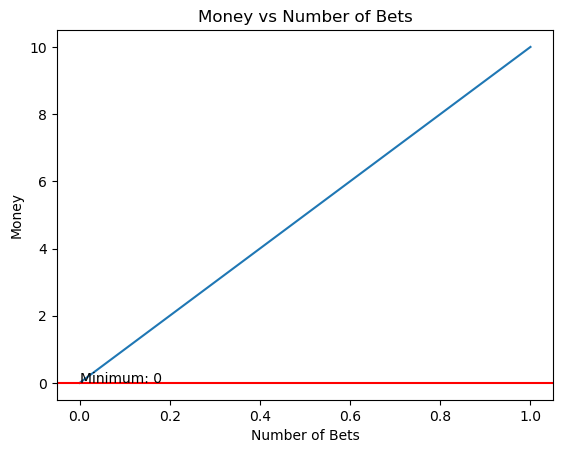

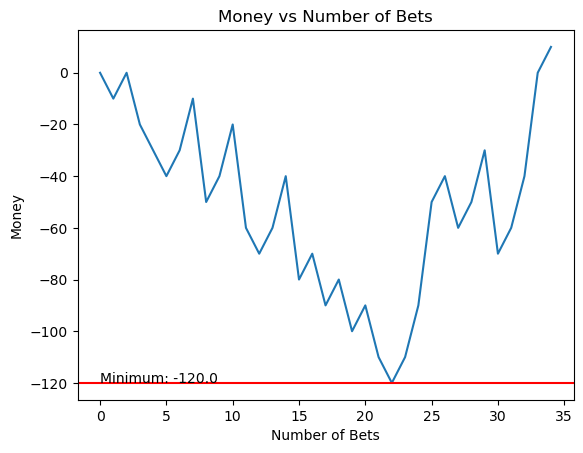

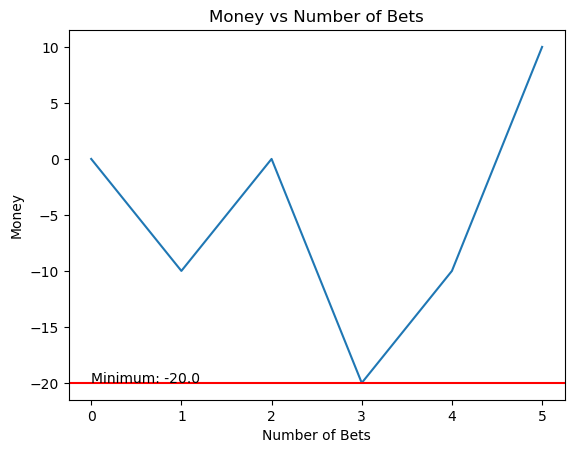

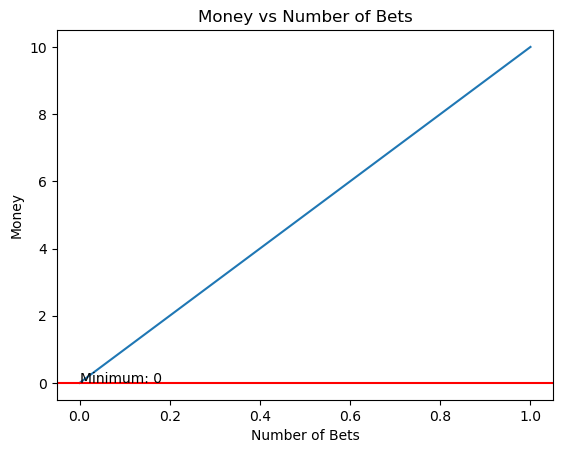

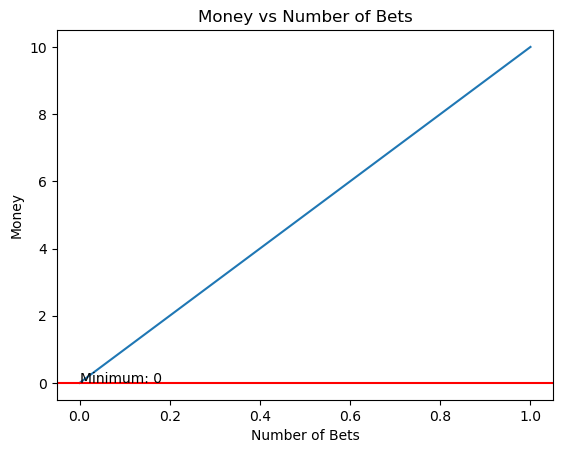

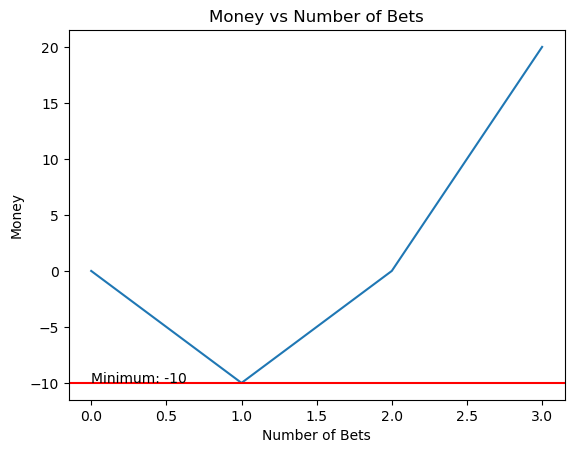

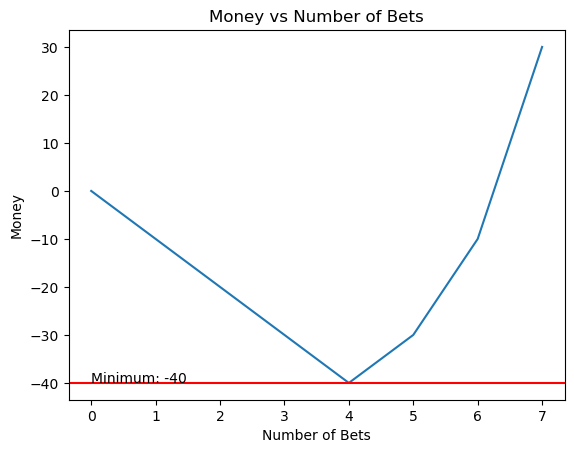

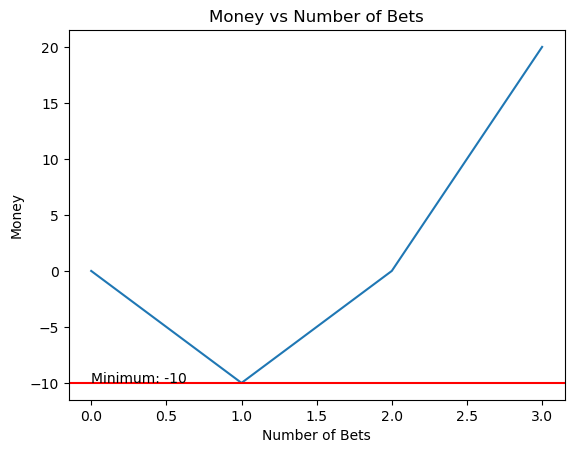

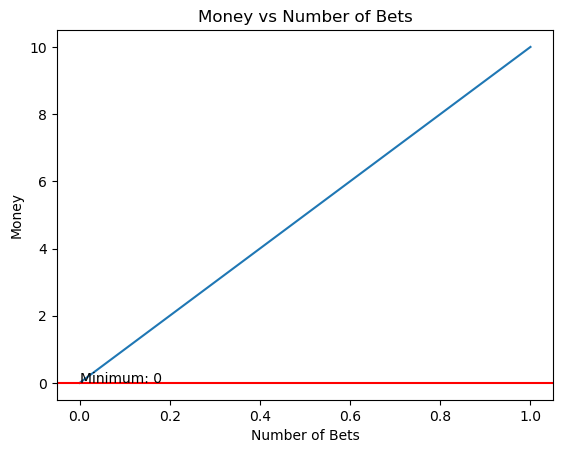

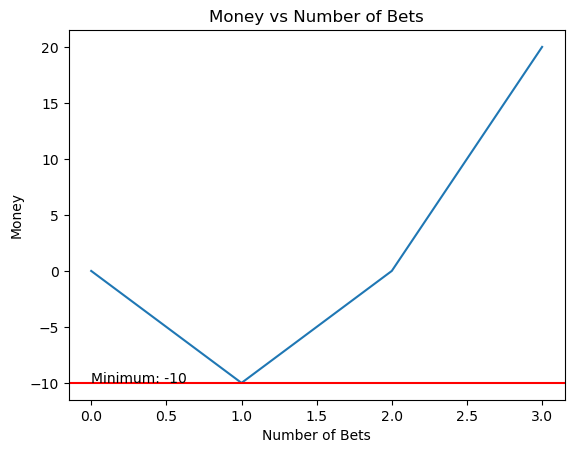

In [163]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [164]:
UNITS = 100

In [165]:
len(successful_histories[UNITS])

9354

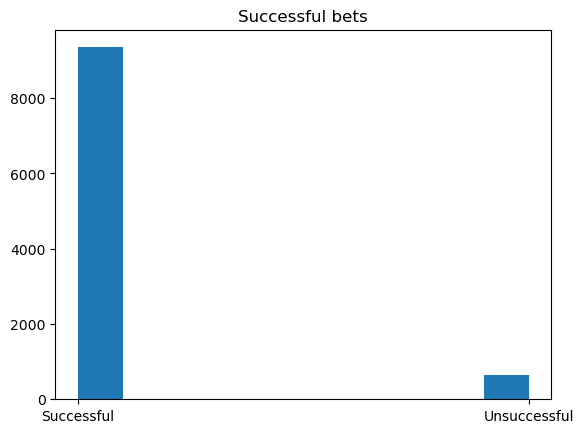

In [166]:
plot_successful_bets(money_histories[UNITS], UNITS)

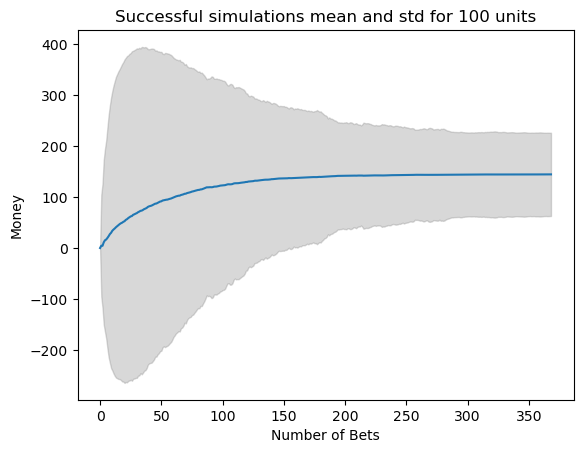

In [167]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Successful simulations mean and std for {UNITS} units')

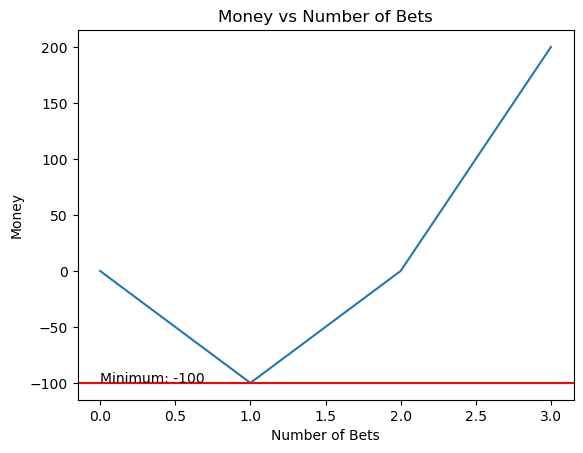

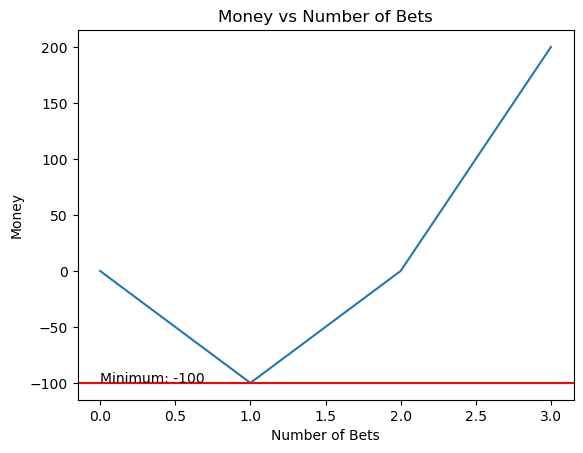

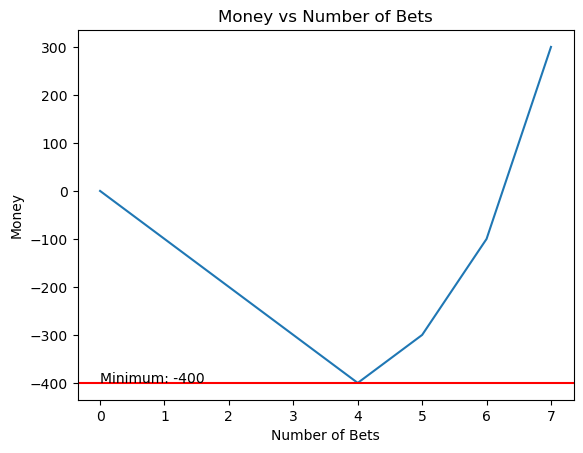

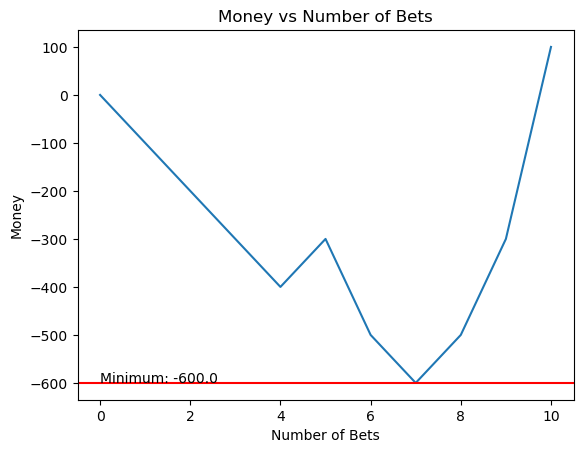

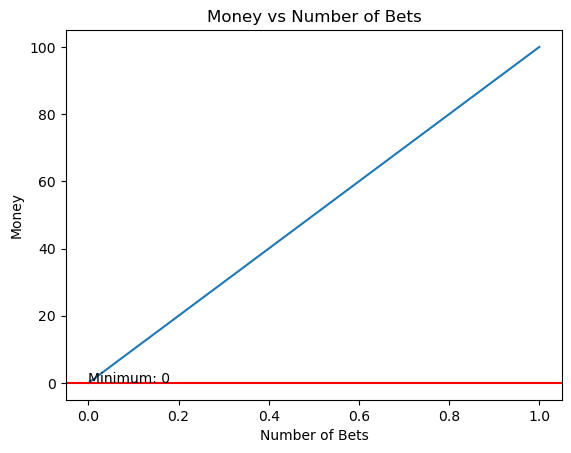

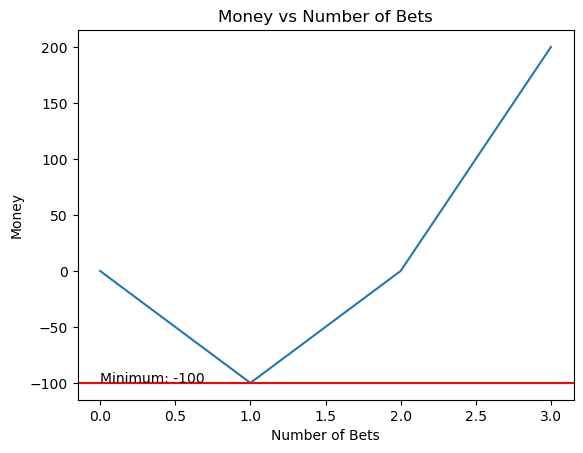

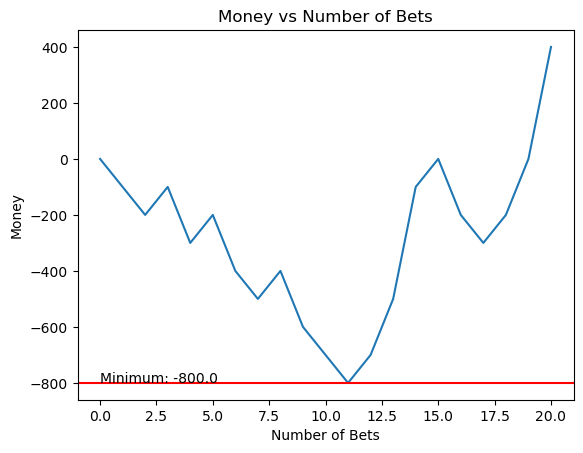

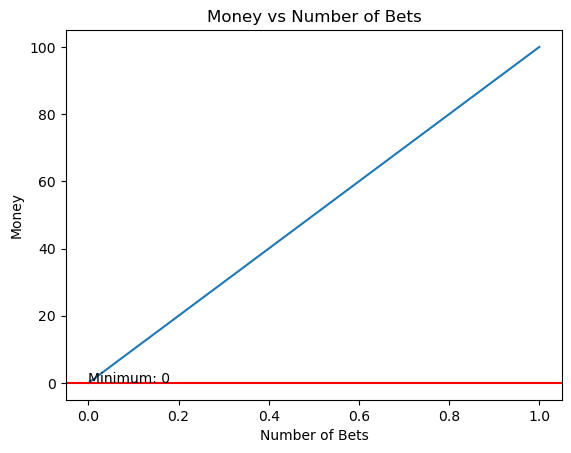

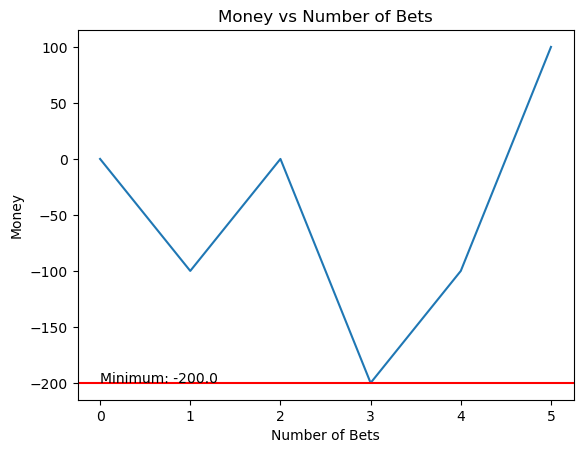

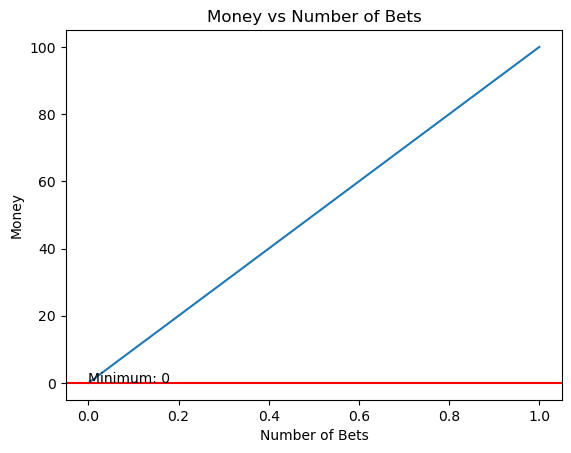

In [168]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [169]:
UNITS = 500

In [170]:
len(successful_histories[UNITS])

9383

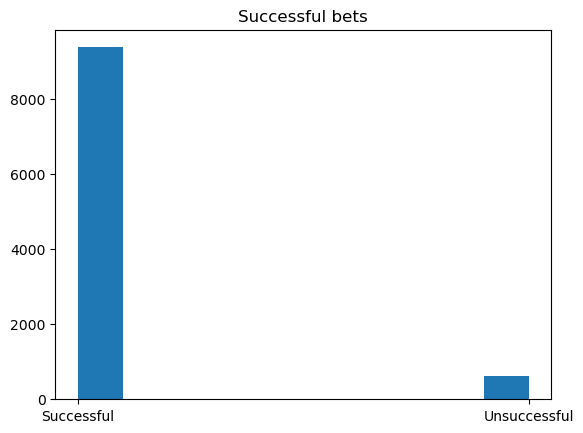

In [171]:
plot_successful_bets(money_histories[UNITS], UNITS)

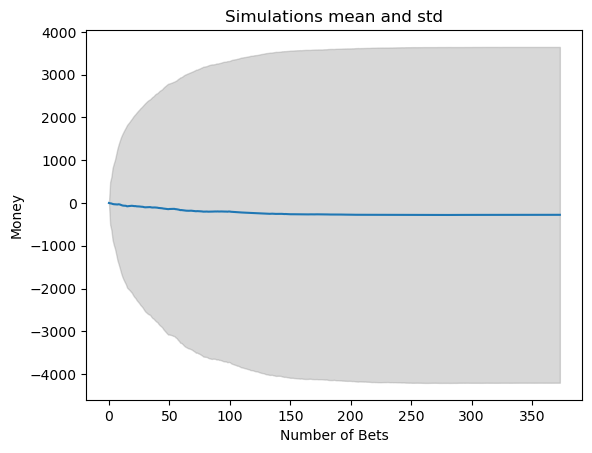

In [172]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

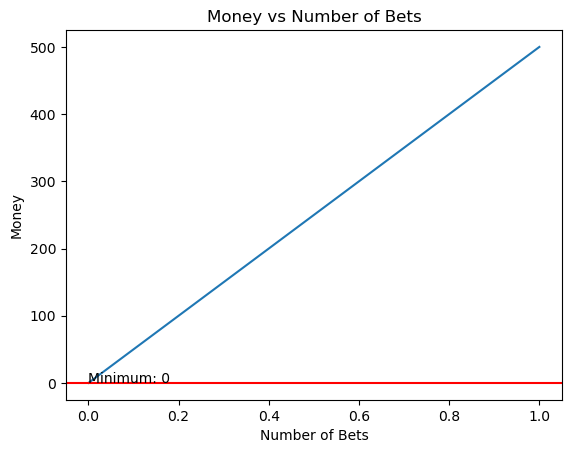

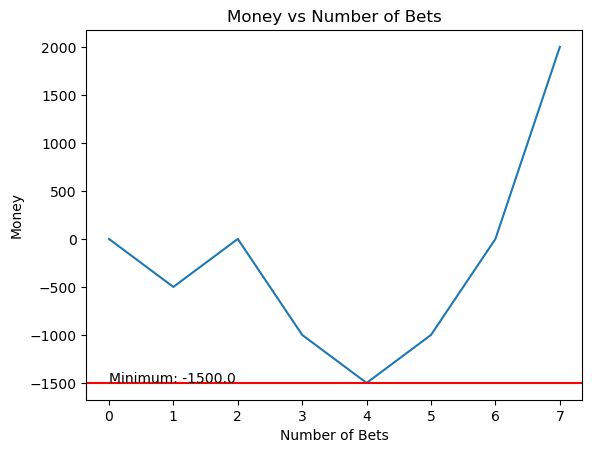

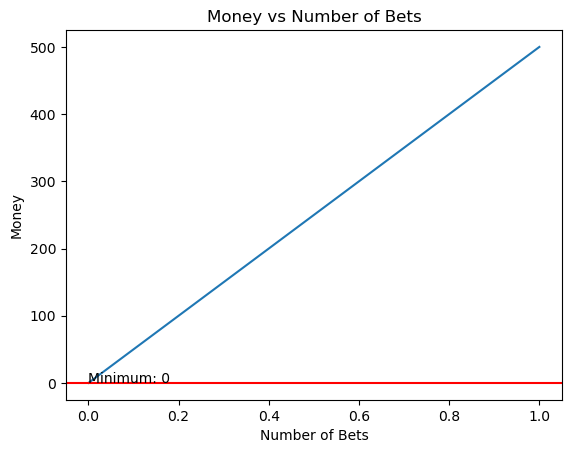

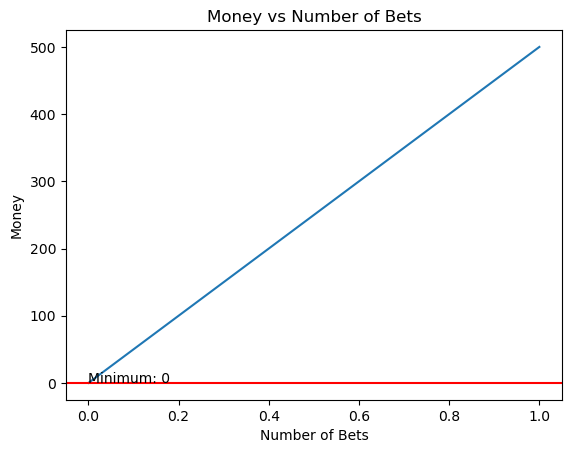

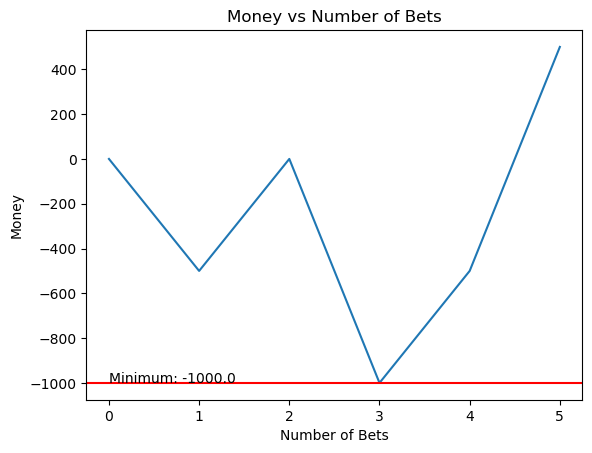

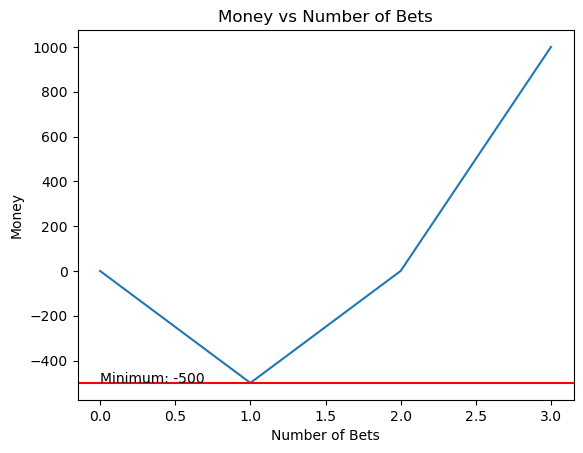

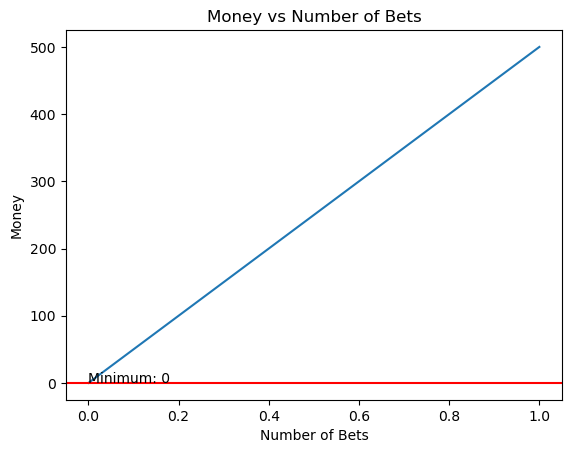

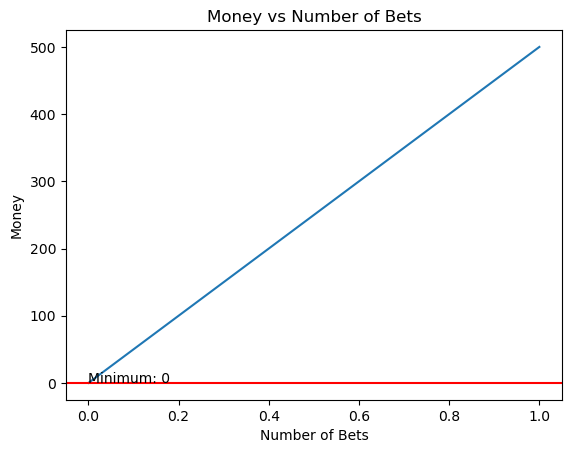

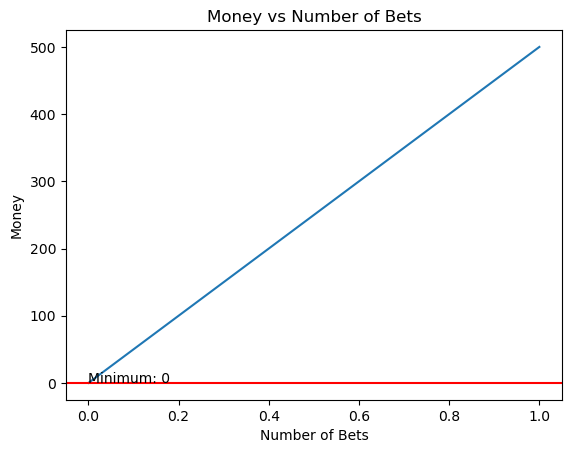

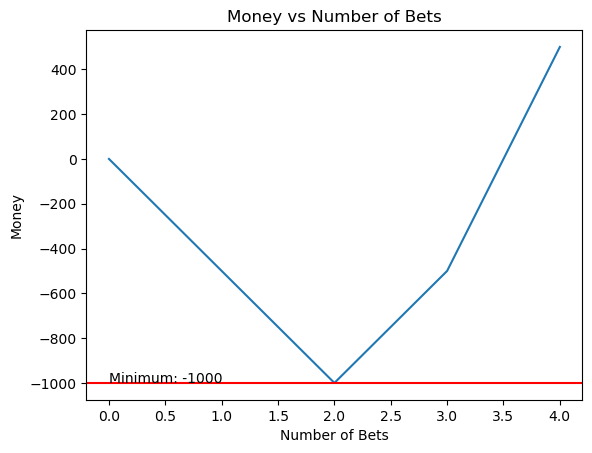

In [173]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [174]:
UNITS = 1000

In [175]:
len(successful_histories[UNITS])

9359

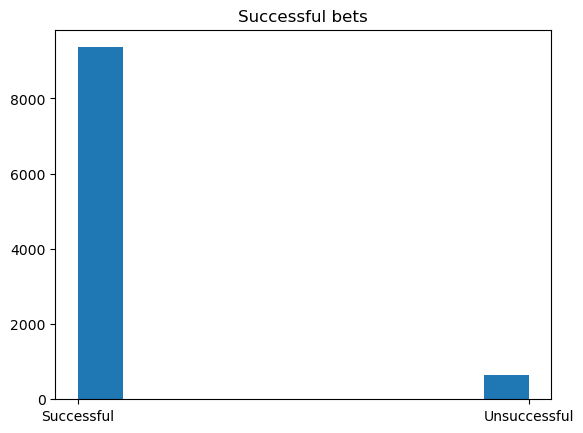

In [176]:
plot_successful_bets(money_histories[UNITS], UNITS)

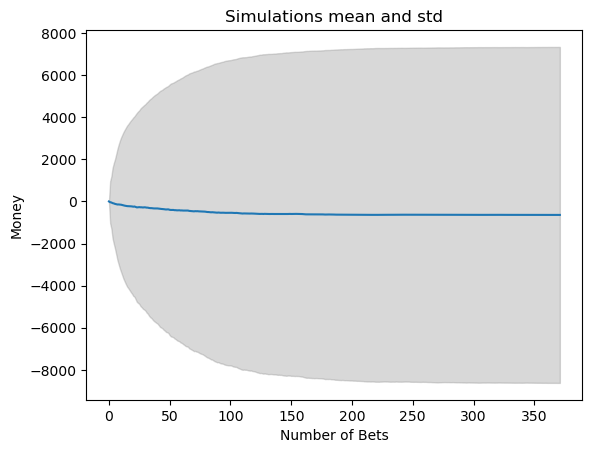

In [177]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

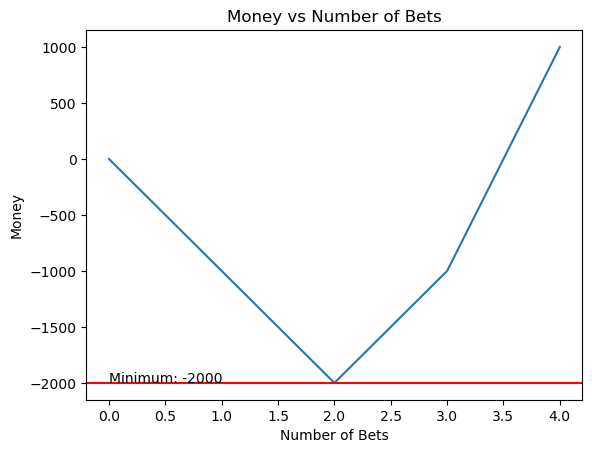

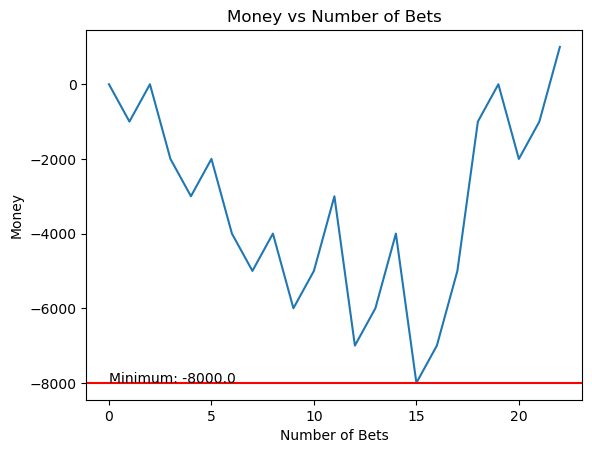

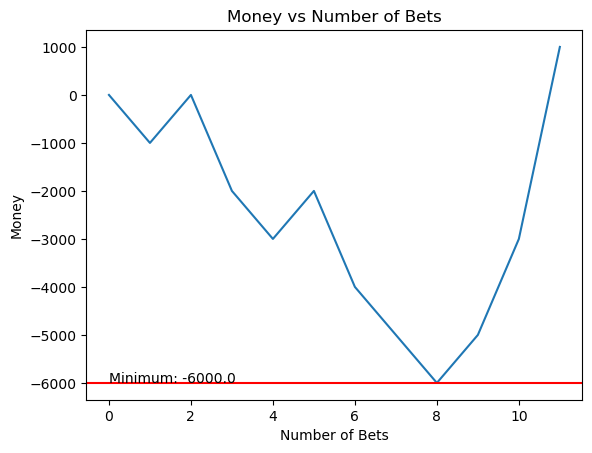

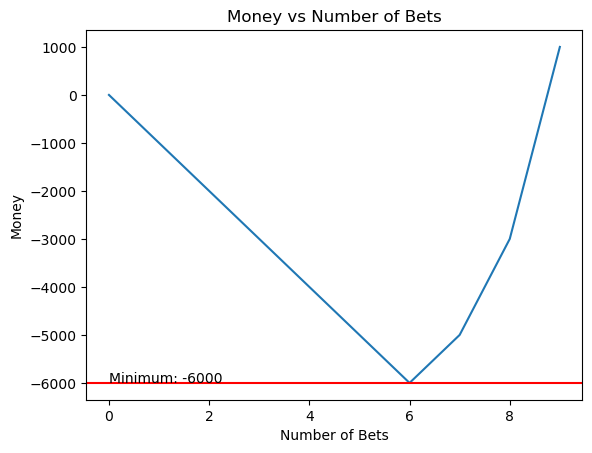

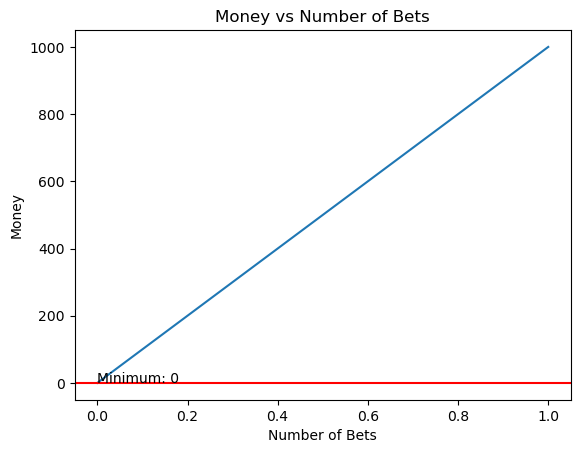

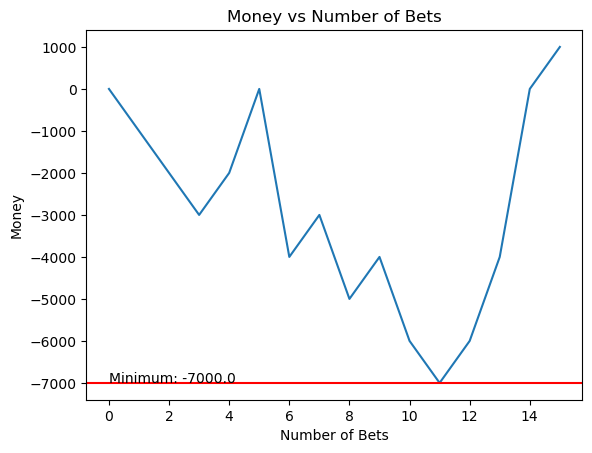

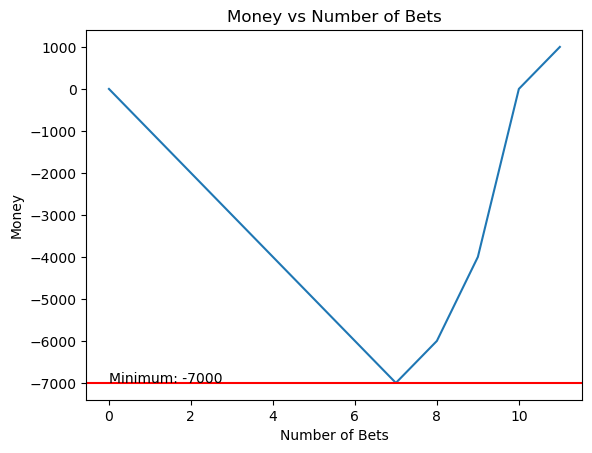

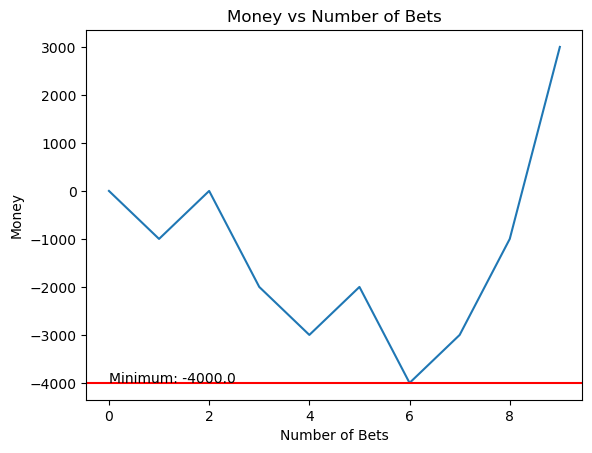

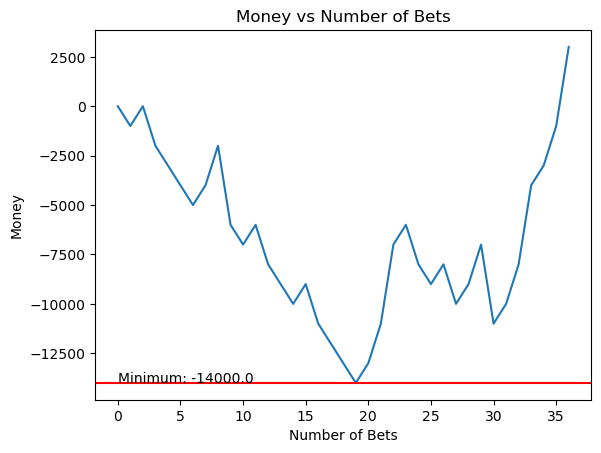

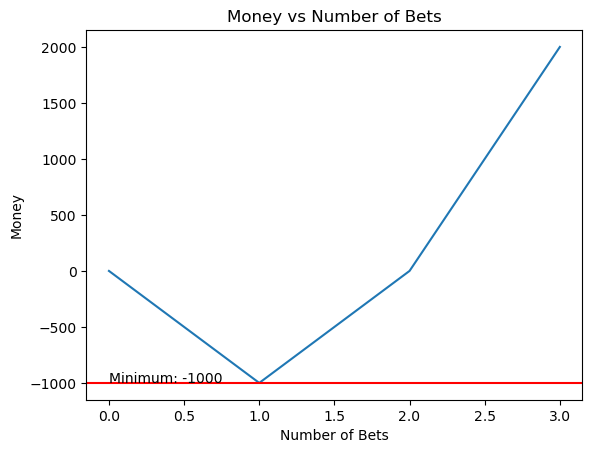

In [178]:
plot_money_histories(successful_histories, UNITS)